#   Bessel Processes Part I

The purpose of these notebooks (Bessel Processes Part I-III) is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of their main properties. 

- In Part I, we  introduce both Bessel and Squared Bessel processs with integer dimension $d\geq 2.$ 
- In Part II, we will show that Squared Bessel processes with integer dimension satisfy an Stochastic Differential Equation (SDE). This representation will allow us define Squared Bessel processes with real dimension $\delta \geq 0$. 
- Finally, in Part III we will study Bessel processes with general dimension $\delta \geq 0.$

Before diving into the theory, let's start by loading the libraries

-  `matplotlib`  
-  [`aleatory`](https://github.com/quantgirluk/aleatory) 
  
  
together with the style sheet [Quant-Pastel Light](https://github.com/quantgirluk/matplotlib-stylesheets). 

These tools will help us to make insightful visualisation of Bessel processes.

In [2]:
import matplotlib.pyplot as plt
quant_pastel = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(quant_pastel)
plt.rcParams["figure.figsize"] = (12,6)

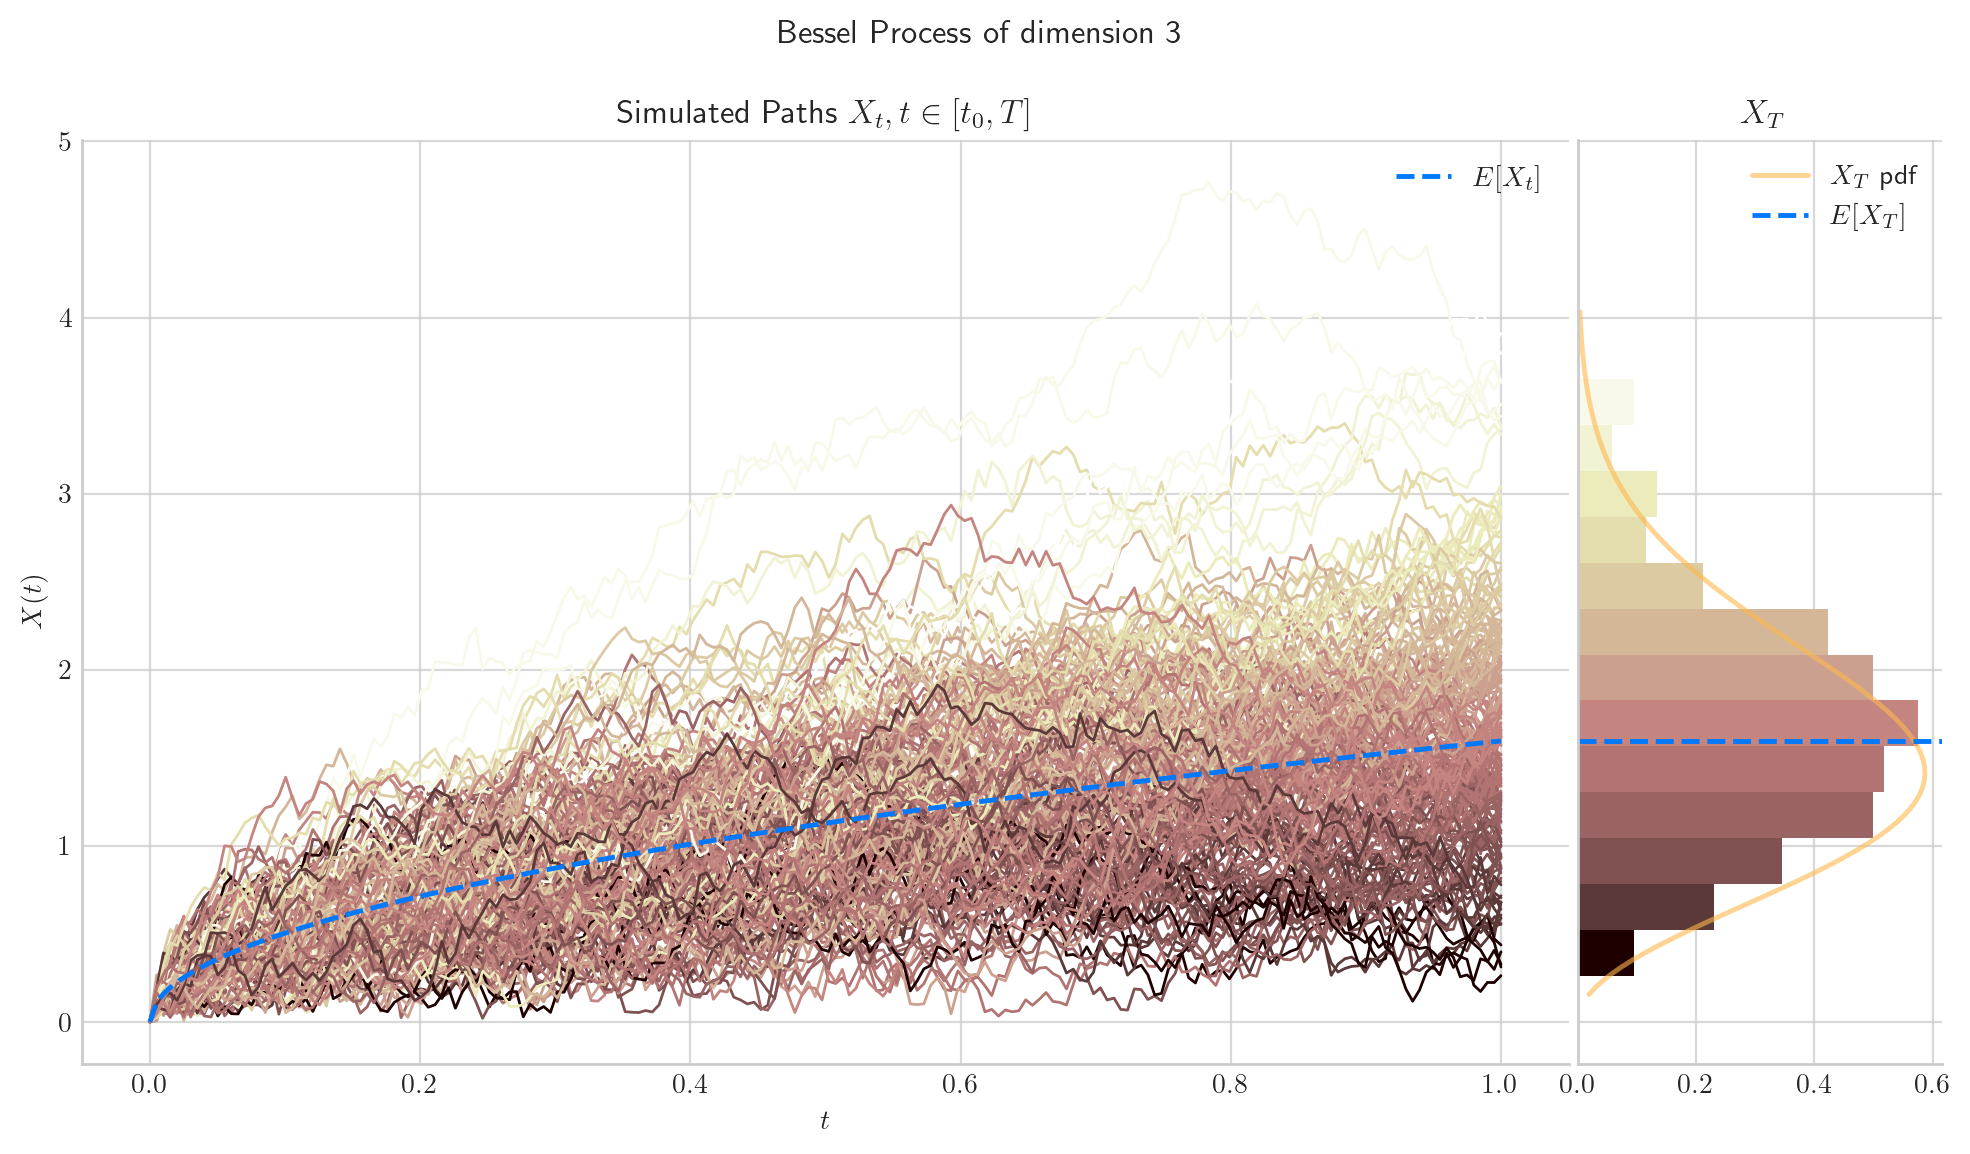

In [3]:
from aleatory.processes import BESProcess, BESQProcess
process = BESProcess(dim=3.0)
process.draw(n=200, N=200, envelope=False, colormap="pink", title="Bessel Process of dimension 3")
plt.show()




```{admonition} Important
In Part I, we will focus on the Bessel processes with **integer dimension** $d\geq 2$, and starting at zero. In the following parts, we will cover how to generalise these two conditions. 
```

## Definition


Let  $W =\{  W_t = (W^1_t, \cdots, W^d_t) : t\geq 0 \},$ be a $d$-dimensional standard Brownian Motion, for some integer $d \geq 2$. 


The **Bessel process** of dimension $d$, is defined as the Euclidean norm of $W$. That is

\begin{equation}
X_t  =  \|W_t\| = \sqrt{\sum_{i=1}^d (W^i_t)^2}, \qquad t \geq 0.
\end{equation} 


Similarly, the **Squared Bessel process**  of dimension $d$, is defined as the squared Euclidean norm of $W$. 

\begin{equation}
Y_t  = \|W_t\|^2 = \sum_{i=1}^d (W^i_t)^2, \qquad t \geq 0.
\end{equation}


`````{admonition} Notation
:class: tip
Hereafter, we will use the following notation:  
- $BES_0^d$ : to denote a Bessel process of dimension $d$ starting at zero, as defined in equation (6.1)
- $BES_0^d$ : to denote a Squared Bessel process of dimension $d$ starting at zero, as defined in equation (6.2)

`````

## Simulation

The previous definitons (in terms of a multidimensional Brownian Motion) allow us to simulate paths from Bessel processes of integer dimension easily as follows.

### Bessel Process

In order to simulate a path from a Bessel process with integer dimension $d\geq 2$,  let us start by taking a discrete partition over an interval $[0,T]$  for the simulation to take place. For simplicity, we are going to take an equidistant partition of size $n\in \mathbb{N}$, over the interval $[0,T]$, i.e.:

\begin{equation*}
t_j = \frac{j}{n-1} T, \qquad  \hbox{for } j = 0, \cdots, n-1.
\end{equation*}

Then, the goal is to simulate a path of the form

$$X_{t_j} = \| W_{t_j} \|, \quad j=0,\cdots, n-1,$$

where $W$ denotes a $d$-dimensional Brownian motion. To do this, we follow the next steps:

- Step 1. For $i=1, \cdots, d$:

    Simulate a path of the form
    
    
    $$\{ W_{t_j}^{i} , j=0,\cdots, n-1\},$$
         
    
    That is, we simulate from $d$ **independent** standard Brownian motions. See [Brownian Motion](https://quantgirluk.github.io/Understanding-Quantitative-Finance/brownian_motion.html) for details on how to simulate from a standard Brownian motion. This allows us to construct the vectors

\begin{equation*}
W_{t_j} = (W_{t_j}^1, \cdots W_{t_j}^d), \qquad j=1,\cdots\ n.
\end{equation*}

- Step 2.  For $j=1,\cdots\ n$:  

    Take the norm of such vectors, that is

    \begin{equation*}
    X_{t_j} =  \sqrt{ \sum_{i=1}^d (W_{t_j}^{i})^2 }.
    \end{equation*}

In [4]:
# Snippet to simulate a path from a Bessel process with integer dimension
from aleatory.processes import BrownianMotion
import numpy as np

d = 3
T = 1.0
n = 100

times = np.linspace(0, T, n) # Partition of the interval [0,T]
brownian = BrownianMotion(T) # A Brownian Motion instance

brownian_samples = [brownian.sample_at(times) for _ in range(d)] # Step 1. Building the vectors (W_{t_j}^1 , ... W_{t_j}^d)
bessel_path = np.array([np.linalg.norm(coord) for coord in zip(*brownian_samples)]) # Step 2. Taking the Euclidian norm

Now, let's plot our simulated path!

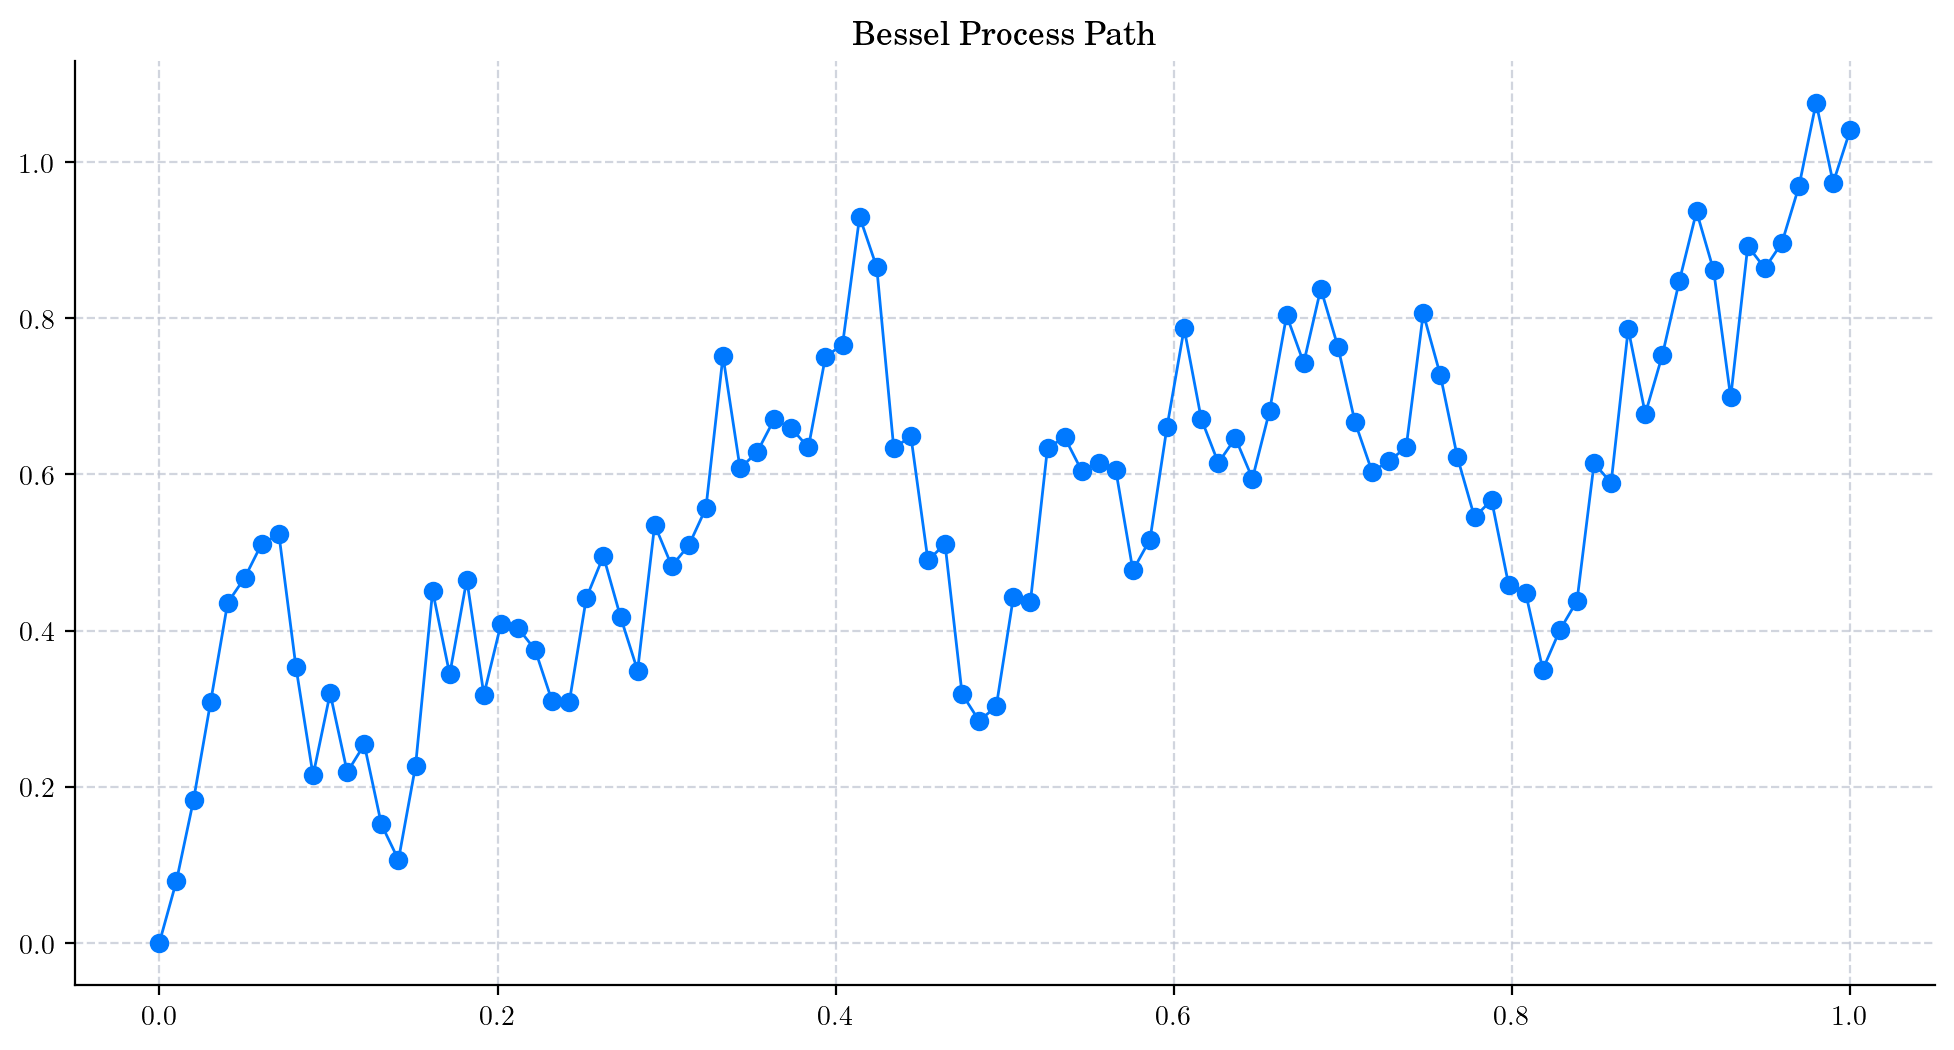

In [5]:
plt.plot(times, bessel_path, 'o-', lw=1)
plt.title('Bessel Process Path')
plt.show()

```{note}
In this plot, we are using a linear interpolation to draw the lines between the simulated points. 
```

### Squared Bessel Process

We can follow the same logic to simulate a path from a Squared Bessel process. The only differences is the calculation in Step 2. Instead of calculating the norm we just get the squared norm, i.e.:

\begin{equation*}
Y_{t_j} =   \sum_{i=1}^d (W_{t_j}^{i})^2 , \qquad j=1,\cdots\ n.
\end{equation*}

Let's write this in `Python`.

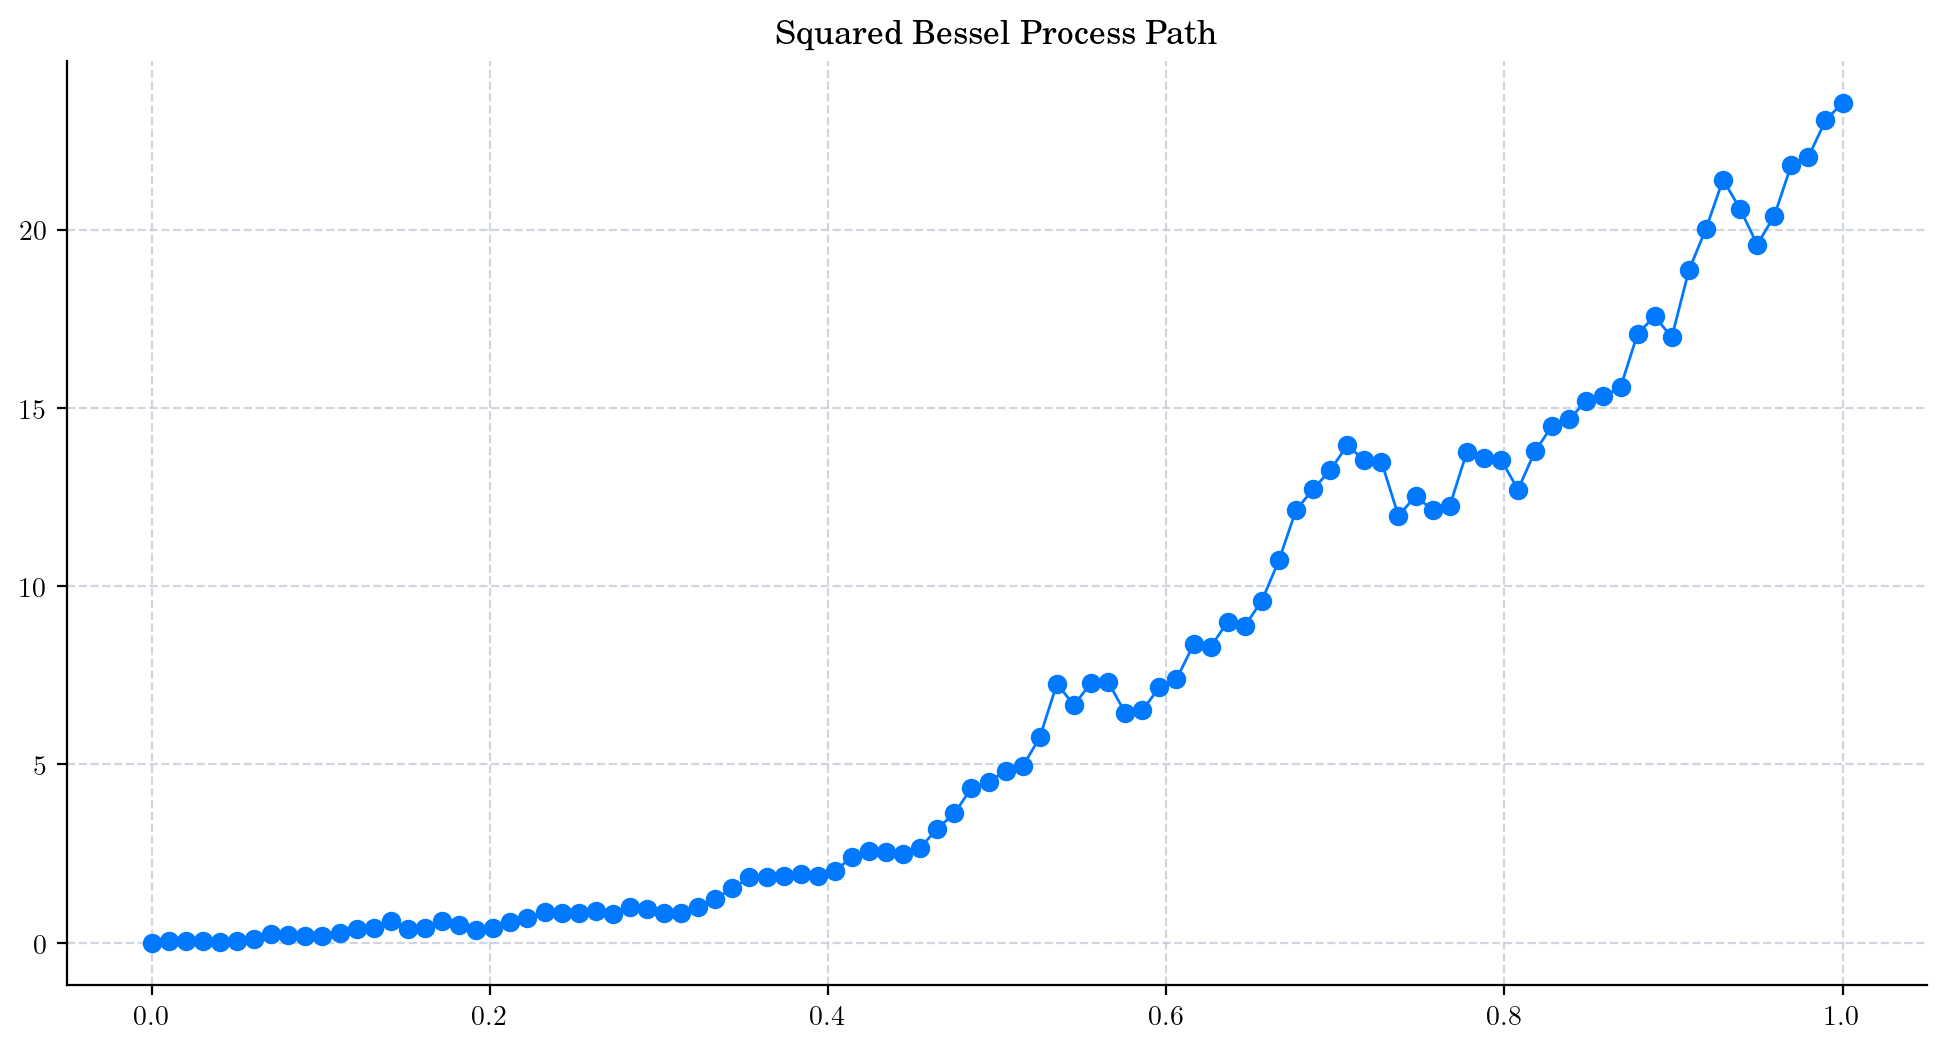

In [6]:
# Snippet to simulate a path from a Squared Bessel process with integer dimension
d = 4
T = 1.0
n = 100

times = np.linspace(0, T, n) # Partition of the interval [0,T]
brownian = BrownianMotion(T) # A Brownian Motion instance

brownian_samples = [brownian.sample_at(times) for _ in range(d)] # Step 1. Building the vectors (W_{t_j}^1 , ... W_{t_j}^d)
bessel_path = np.array([(np.linalg.norm(coord))**2 for coord in zip(*brownian_samples)]) # Step 2 (Modified). Taking the Square of the Euclidian norm

plt.plot(times, bessel_path, 'o-', lw=1) # Plot the path
plt.title('Squared Bessel Process Path')
plt.show()

### Simulating and Visualising Paths

To simulate several paths from Bessel and Squared Bessel processes and visualise them we can use the methods `simulate` and `plot` from the `aleatory` library. 

Let’s simulate 5 paths from a Bessel Process of dimension 3, over the interval $[0,1]$ using a partition of 100 points.


`````{admonition} Tip
:class: tip
Remember that  the number of points in the partition is defined by the parameter $n$, while  the number of paths is determined by $N$.
`````

The following snippet simulates the paths and returns them as a numpy array object.

In [7]:
# Snippet to Simulate N paths from the Bessel process
from aleatory.processes import BESProcess
bes = BESProcess(dim= 3)
paths = bes.simulate(n=100, N=5)

If we want to simulate and visualise the paths, we will use the method `plot` from the `aleatory` library.

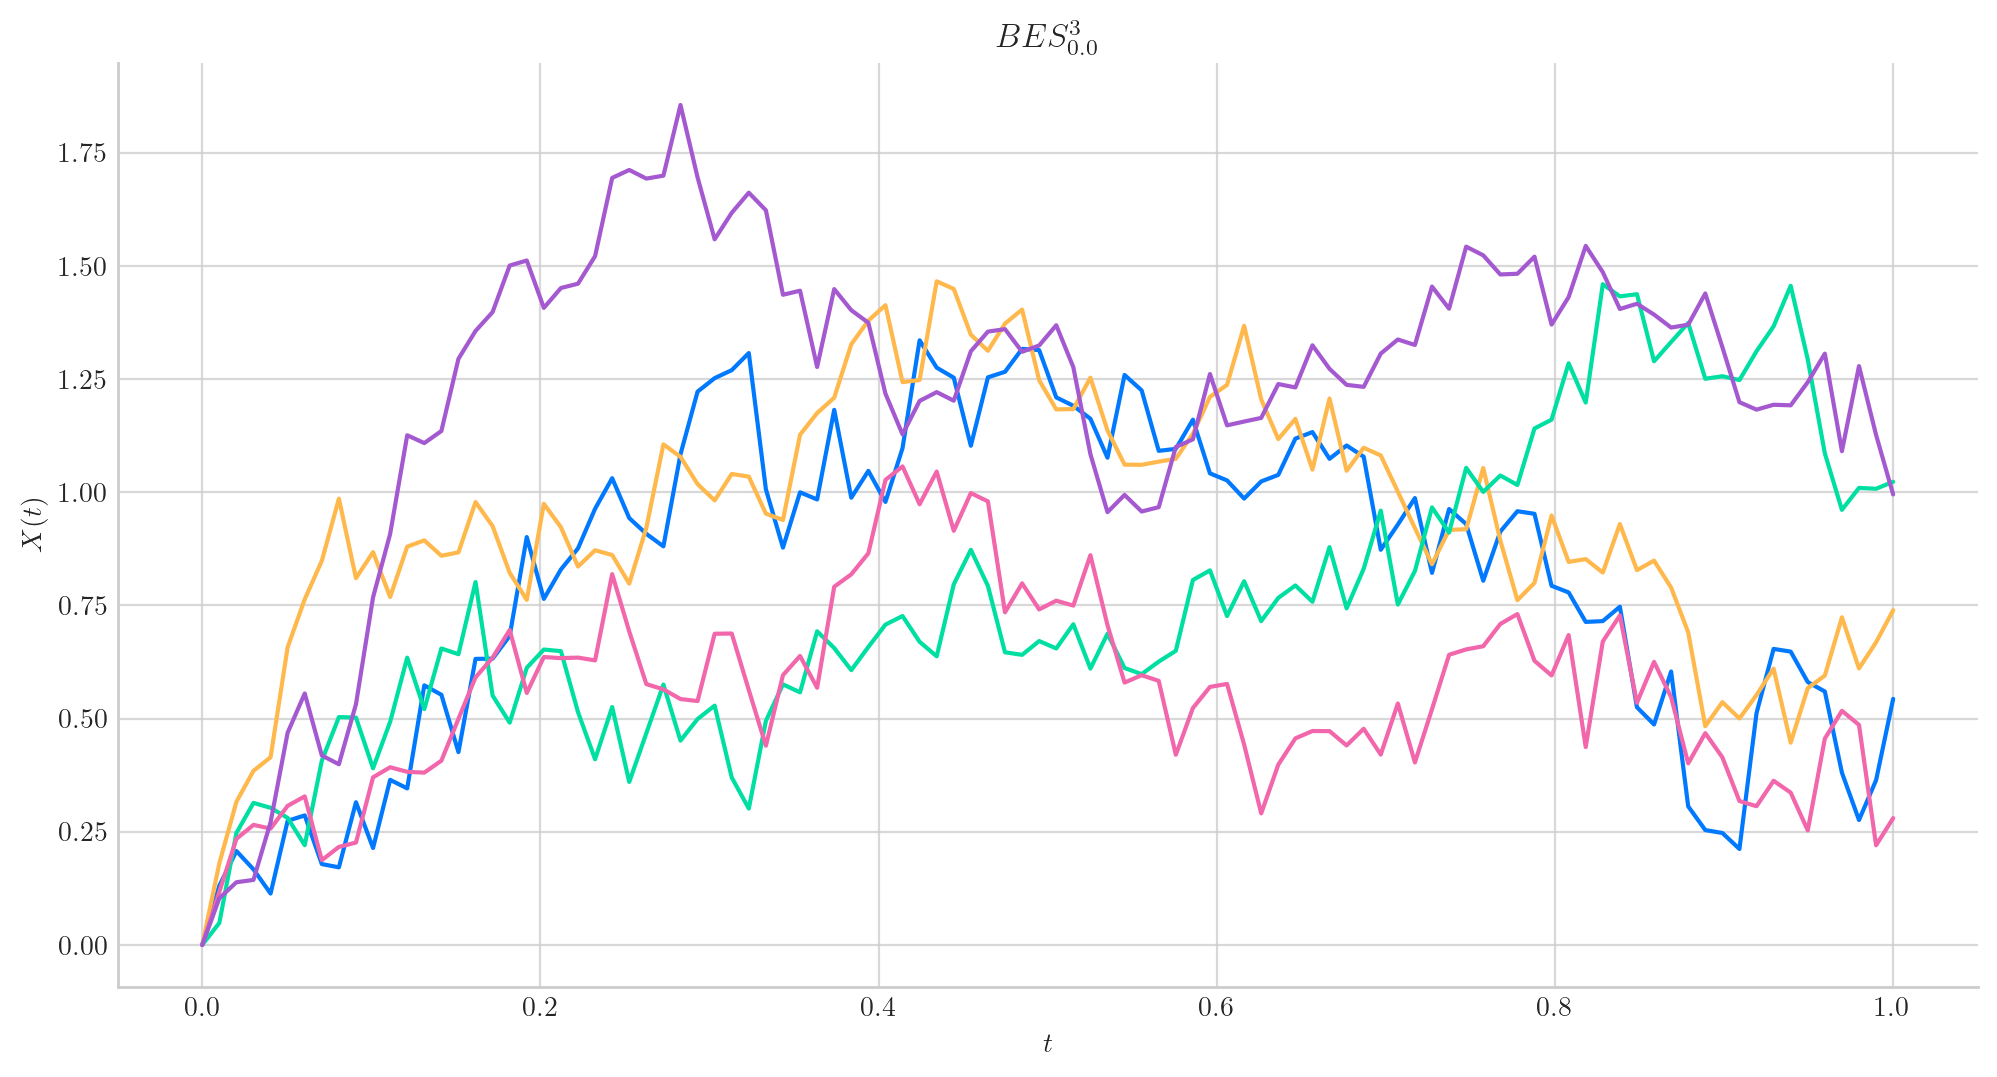

In [8]:
# Snippet to Simulate and Visualise the paths from the Bessel process
from aleatory.processes import BESProcess
bes = BESProcess(dim= 3)
bes.plot(n=100, N=5)
plt.show()

Similarly, let’s simulate 5 paths from a Squared Bessel process of dimension 6, over the interval $[0,1]$ using a partition of 100 points.

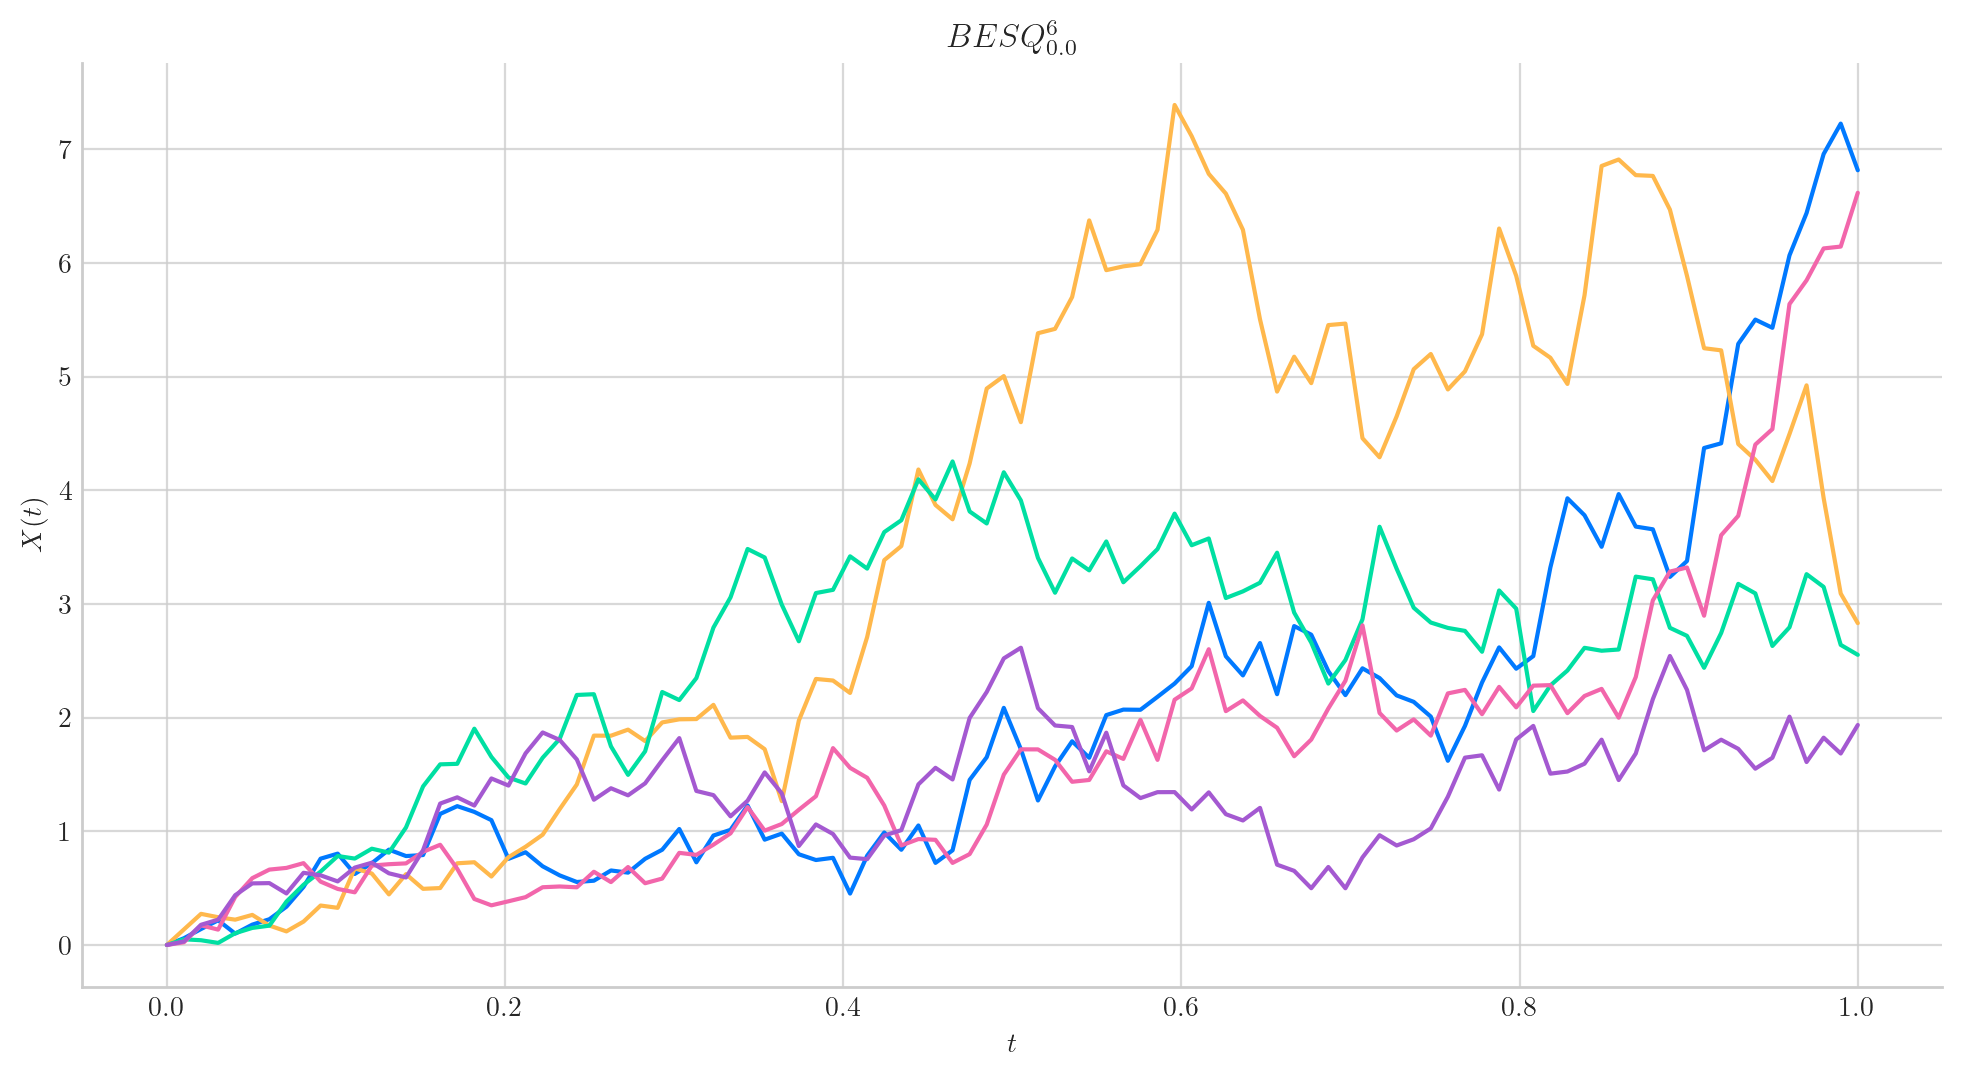

In [9]:
# Snippet to Simulate and Visualise the paths from the Squared Bessel process
from aleatory.processes import BESQProcess
bes = BESQProcess(dim= 6)
bes.plot(n=100, N=5)
plt.show()

```{note}
In all plots we are using a linear interpolation to draw the lines between the simulated points. 
```

## Marginal Distributions

For any given $t\geq 0$, the definition of a $d$-dimensional Brownian Motion implies that each component  $W^i_t$, follows a normal distribution $\mathcal{N}(0,t)$. Moreover, these components are independent of each other. 

Hence, we have

\begin{equation}
X_t =  \sqrt{t} \sqrt{ \sum_{i=1}^d \left( \dfrac{W_t^i}{ \sqrt{t}} \right)^2 } \sim \sqrt{t} \chi(d), \qquad t\geq 0,
\end{equation}

i.e.; the marginal distribution of a Bessel process $BES_0^d$ (with integer dimension $d\geq2$) is a scaled [Chi](https://en.wikipedia.org/wiki/Chi_distribution) random-variable with $d$-degrees of freedom. 


Similarly,

\begin{equation}
Y_t = \sum_{i=1}^d (W^i_t)^2  =  t \sum_{i=1}^d \left( \dfrac{W_t^i}{\sqrt{t}} \right)^2 \sim t \chi^2(d), \qquad t\geq 0,
\end{equation}


that is, the marginal distribution of a Squared Bessel process $BESQ_0^2$ (with integer dimension $d\geq 2$) is a scaled [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) with $d$-degrees of freedom.

```{note}
- The number of  degrees of freedom $d$ does not depend on $t$, which means that the number of degrees of freedom remains constant as the process evolves.
```

### Expectation and Variance


#### Bessel

For each $t>0$, the  marginal distribution $X_t|X_0=0$ from a Bessel process $BES_0^d$, with integer dimension $d\geq 2$, satisfies

\begin{equation*}
\mathbf{E}[X_t] = \mathbf{E}\left[ \sqrt{t} \sqrt{ \sum_{i=1}^d \left( \dfrac{W_t^i}{ \sqrt{t}} \right)^2 } \right]= \sqrt{2t}  \dfrac{\Gamma (\frac{d+1}{2})}{\Gamma (\frac{d}{2})} ,
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [X_t ] = \mathbf{Var}\left[\sqrt{t} \sqrt{ \sum_{i=1}^d \left( \dfrac{W_t^i}{ \sqrt{t}} \right)^2 } \right]=  t d - \mathbf{E}[X_t]^2  = td - 2t \left(   \dfrac{\Gamma (\frac{d+1}{2})}{\Gamma (\frac{d}{2})} \right)^2,
\end{equation*}

##### Python Implementation

For given $d\geq 2, t\geq 0$, we can implement the above formulas for the expectation, and variance, as follows. 

In [10]:
from scipy.special import gamma
from math import sqrt
d = 3
t= 2

expectation = sqrt(2*t)*gamma((d+1)/2)/gamma(d/2) 
variance = t*d - expectation**2

print(f'For d={d}' , f't={t}', sep=", ")
print(f'E[X_t] = {expectation: .6f}')
print(f'Var[X_t] = {variance :.6f}')

For d=3, t=2
E[X_t] =  2.256758
Var[X_t] = 0.907042


Alternatively, we can use the method `get_marginal` to obtain the marginal distribution and the get its mean and variance

In [11]:
from aleatory.processes import BESProcess
d = 3
t= 2
bes = BESProcess(dim=d)
marginal = bes.get_marginal(t=t)
print(marginal.mean())
print(marginal.var())

2.2567583341910256
0.9070418210593473


#### Squared Bessel

For each $t>0$, the conditional marginal $Y_t|Y_0=0$ from a Squared Bessel process starting from zero with integer dimension $d\geq 2$, satisfies

\begin{equation*}
\mathbf{E}[Y_t] = \mathbf{E}\left[ t \sum_{i=1}^d \left( \dfrac{W_t^i}{\sqrt{t}} \right)^2\right]=   t d ,
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [Y_t ] = \mathbf{Var}\left[ t \sum_{i=1}^d \left( \dfrac{W_t^i}{\sqrt{t}} \right)^2\right]=  t^2 2d ,
\end{equation*}

##### Python Implementation

For given $d\geq 2, t\geq 0$, we can implement the above formulas for the expectation, and variance, as follows. 

In [12]:
d = 3
t= 2

expectation = t*d
variance = (t**2)*(2*d) 
print(f'For d={d}' , f't={t}', sep=", ")
print(f'E[Y_t] = {expectation: .6f}')
print(f'Var[Y_t] = {variance :.6f}')

# from aleatory.processes import BESProcess
bes = BESQProcess(dim=d)
marginal = bes.get_marginal(t=t)
print(marginal.mean())
print(marginal.var())

For d=3, t=2
E[Y_t] =  6.000000
Var[Y_t] = 24.000000
6.0
24.0


### Probability Density Functions


The probability density function (pdf)of the marginal distribution $X_t$, from a  **Bessel process** with integer dimension $d\geq 0$, is given by the following expression

\begin{equation}
f_X(x, t) = \frac{1}{2^{\frac{d}{2}-1} \Gamma\left(\frac{d}{2}\right) \sqrt{t}} \left(\frac{x}{\sqrt{t}}\right)^{d -1} e^{-\frac{x^2}{2 t}}, \qquad x, t>0.
\end{equation}



The probability density function (pdf)of the marginal distribution $Y_t$, from a **Squared Bessel** process with integer dimension $d\geq 0$,  is given by the following expression

\begin{equation}
f_Y(y, t) = \frac{1}{2^{\frac{d}{2}} \Gamma\left(\frac{d}{2}\right) t} \left(\frac{y}{t}\right) ^{\frac{d}{2} -1} e^{-\frac{y}{2 t}}, \qquad y, t>0.
\end{equation}









#### Visualisation 

To visualise these probability density functions in `Python`, we can use the method `get_marginal` from the `aleatory` library. Let's consider a Bessel process `BESProcess(dim=3)` and plot the density function of the marginal $X_1$

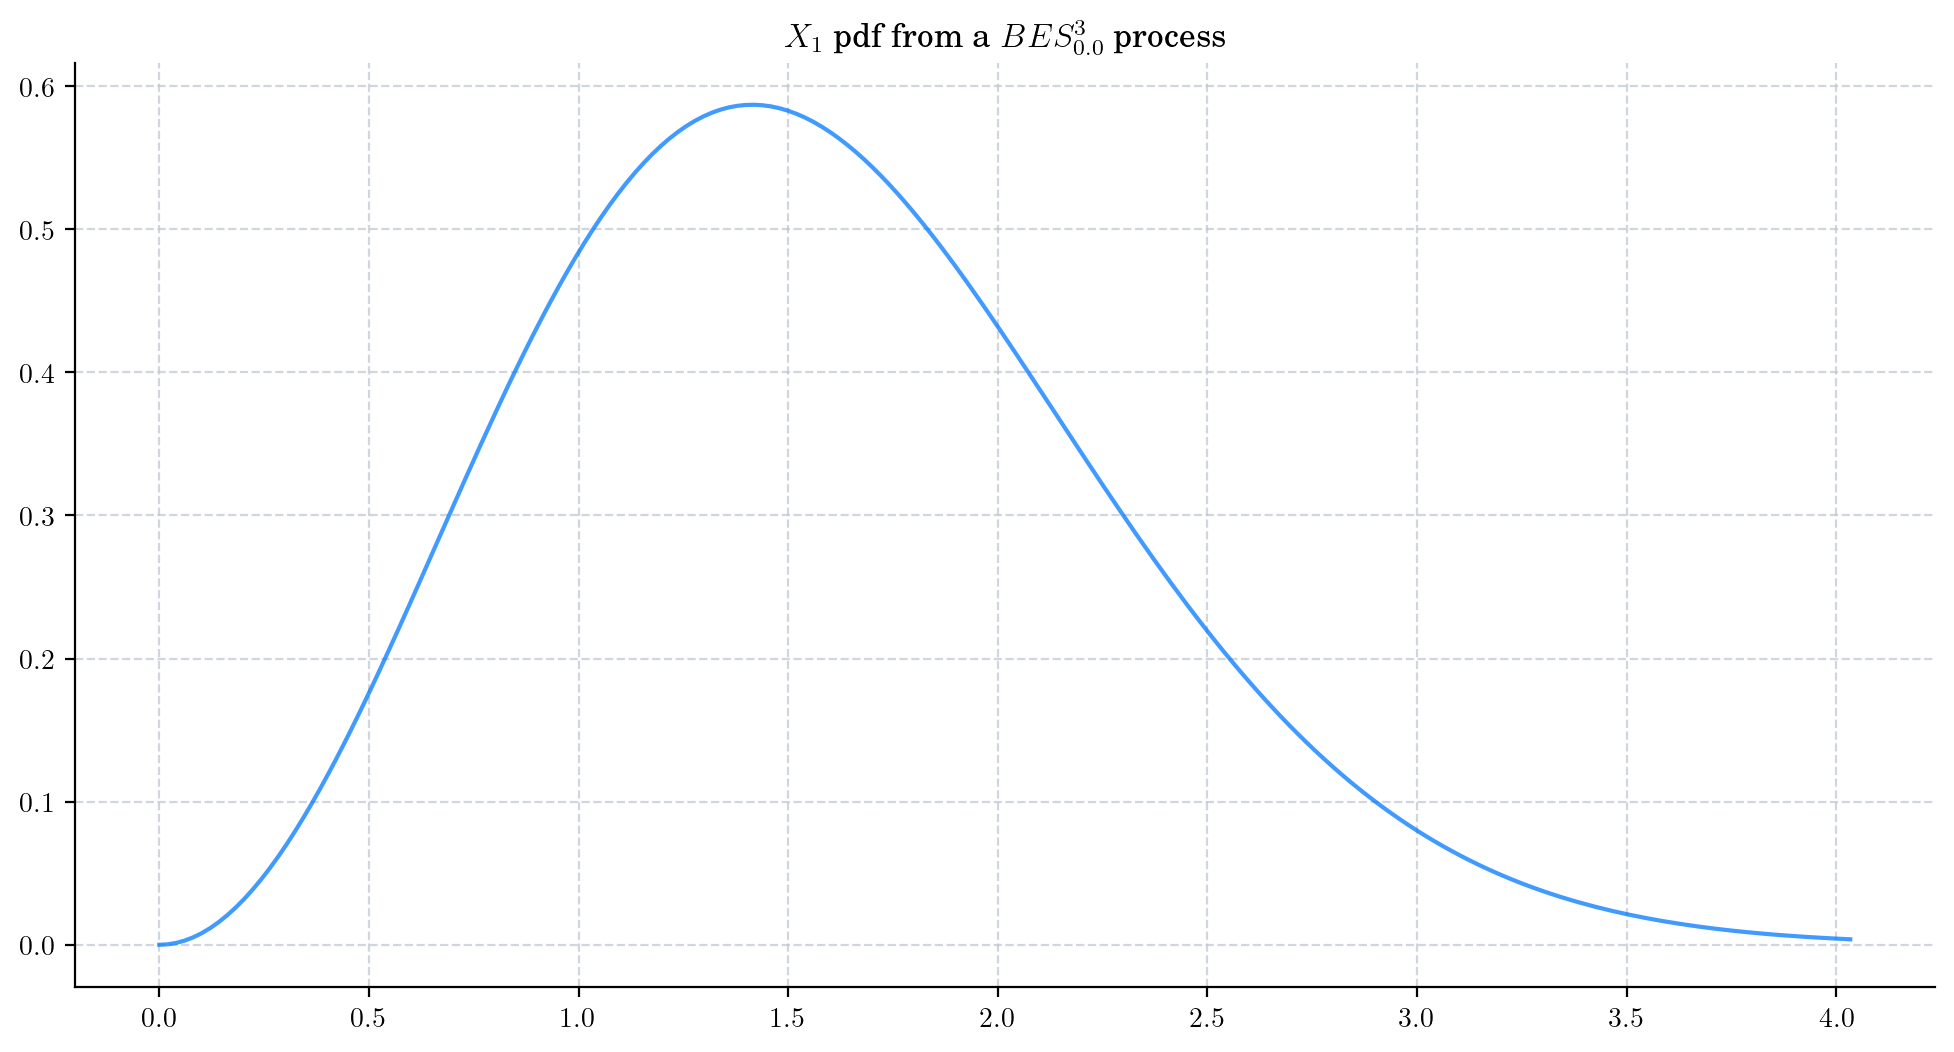

In [13]:
# from aleatory.processes import BESProcess
process = BESProcess(dim= 3)
X_1 = process.get_marginal(t=1)
x = np.linspace(0, X_1.ppf(0.999), 200)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$X_1$ pdf from a ' + process.name + ' process')
plt.show()

We can also use do this by using the fact that $X_1$ follows a Chi distribution with parameter 3.
You can try this alternative method by running the following code. 

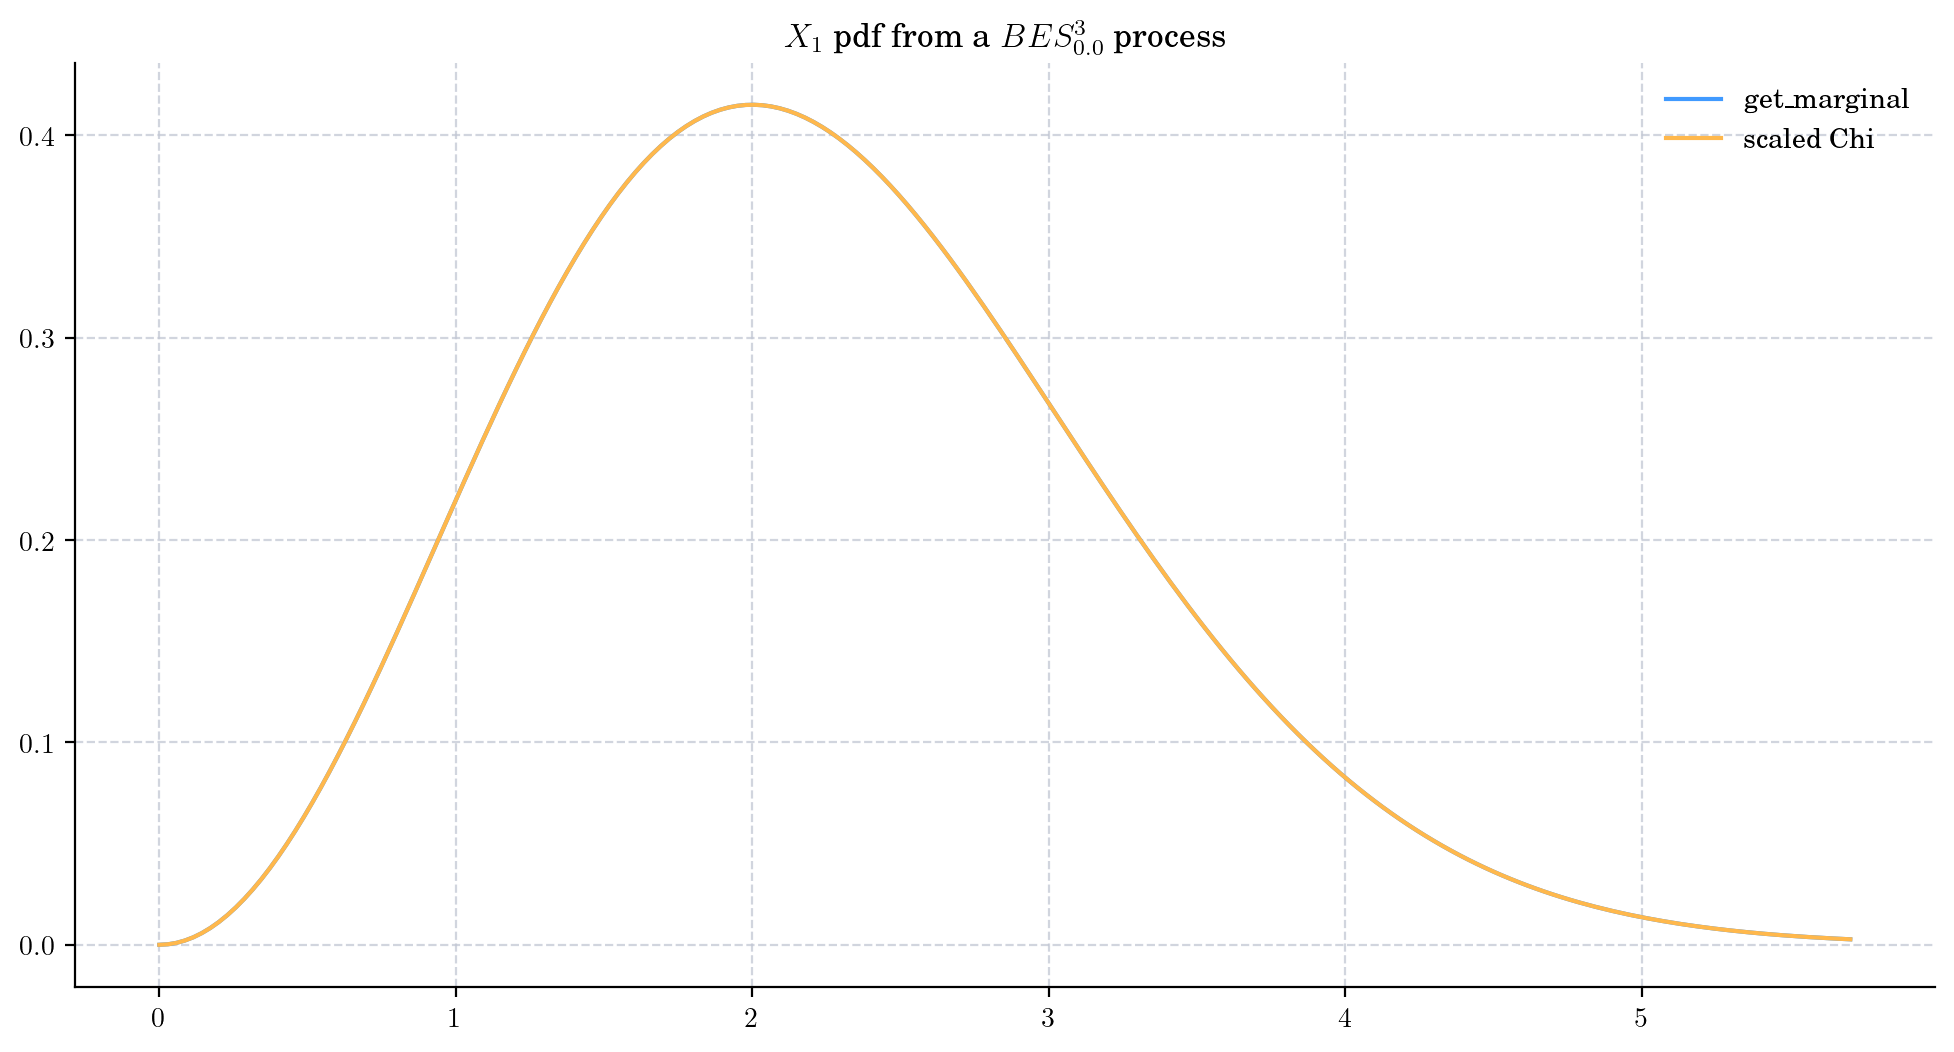

In [14]:
# from aleatory.processes import BESProcess
# import numpy as np 
from scipy.stats import chi

d = 3
t = 2 
process = BESProcess(dim=d)
X_1 = process.get_marginal(t=t)
chi_rv = chi(3, scale=np.sqrt(t))

x = np.linspace(0, X_1.ppf(0.999), 200)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label='get_marginal')
plt.plot(x, chi_rv.pdf(x), label='scaled Chi')
plt.title(f'$X_1$ pdf from a ' + process.name + ' process')
plt.legend()
plt.show()

Similarly, we can take a Squared Bessel process `BESQProcess(dim=3)` and plot the density function of $Y_1$.

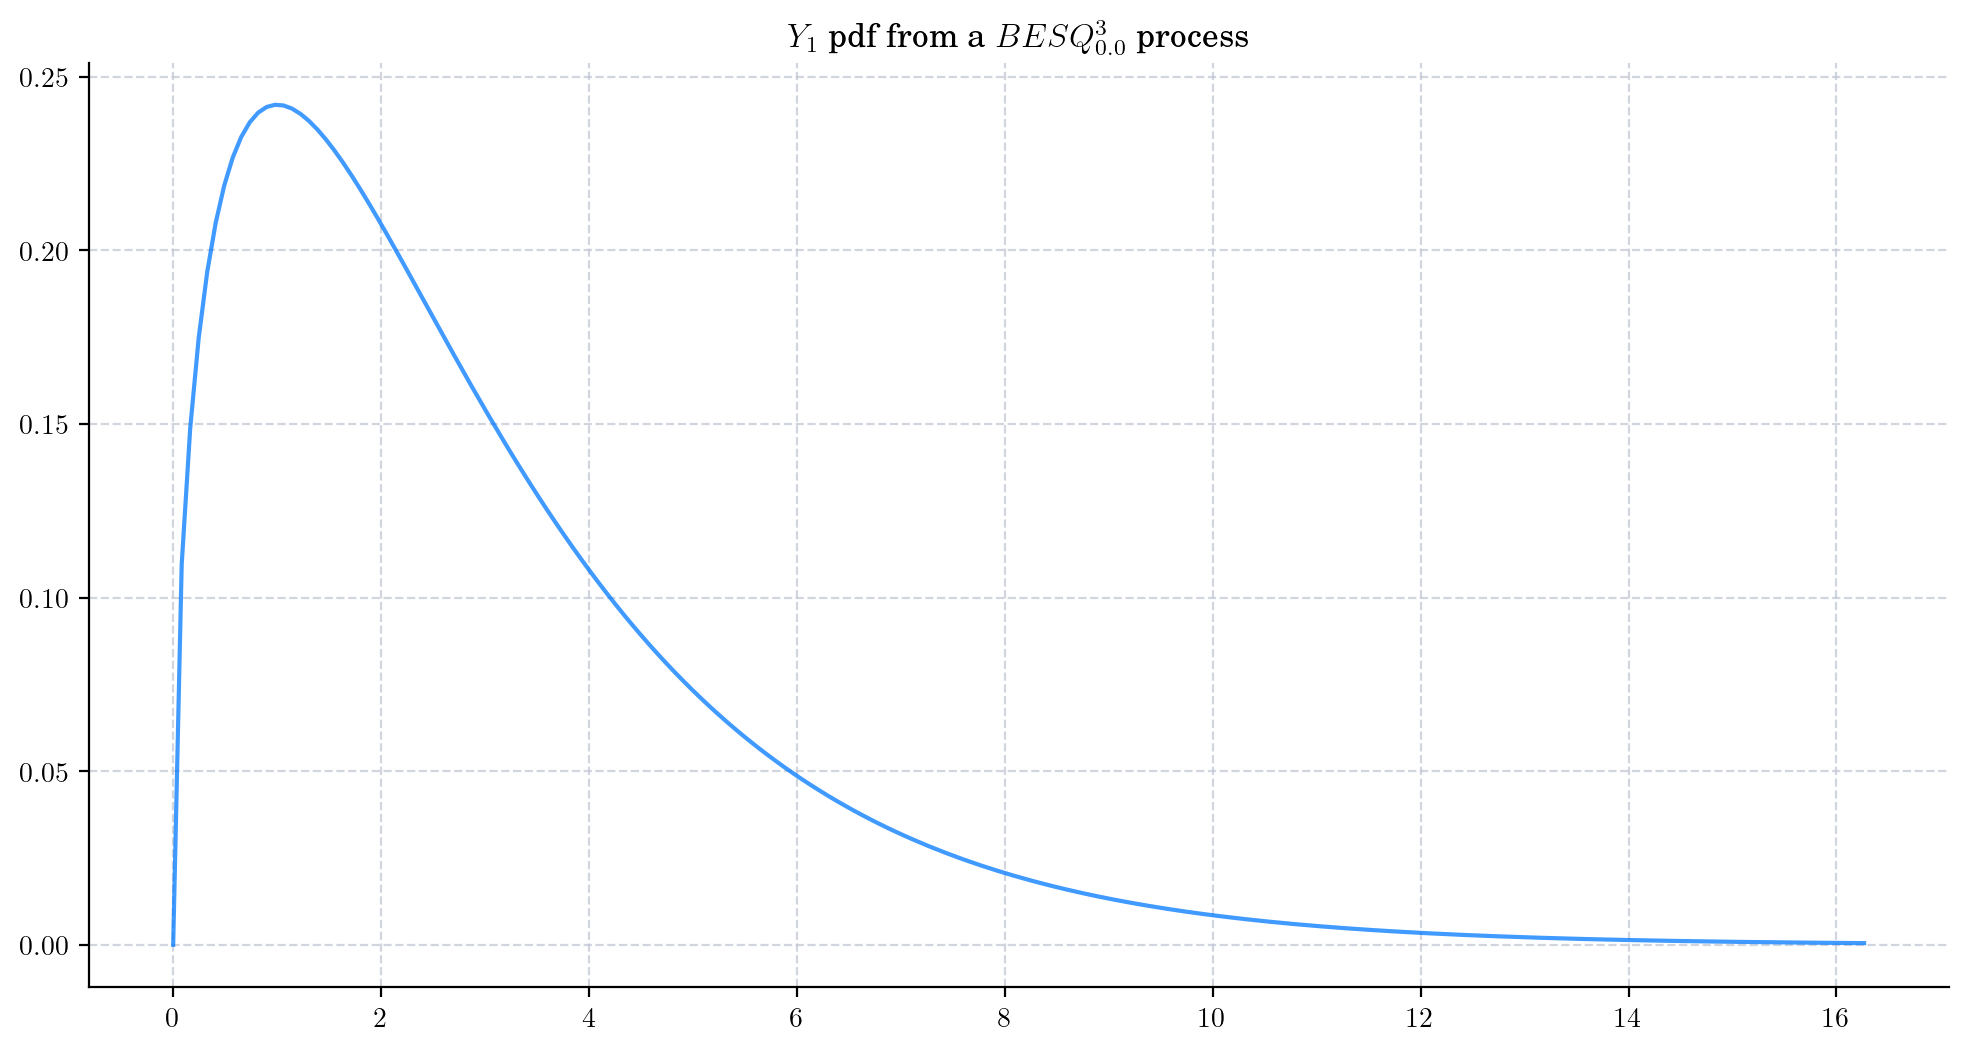

In [15]:
# from aleatory.processes import BESQProcess
process = BESQProcess(dim= 3)
Y_1 = process.get_marginal(t=1)
y = np.linspace(0, Y_1.ppf(0.999), 200)
plt.plot(y, Y_1.pdf(y), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$Y_1$ pdf from a ' + process.name + ' process')
plt.show()

Next, we vary the value of the dimension $d$ and plot the corresponding pdfs. As $d$ increases:

-  The density from the Bessel marginal moves towards the right and becomes more symmetric. 
-  The density from the Squared Bessel marginal becomes wider and the shape changes as well. 

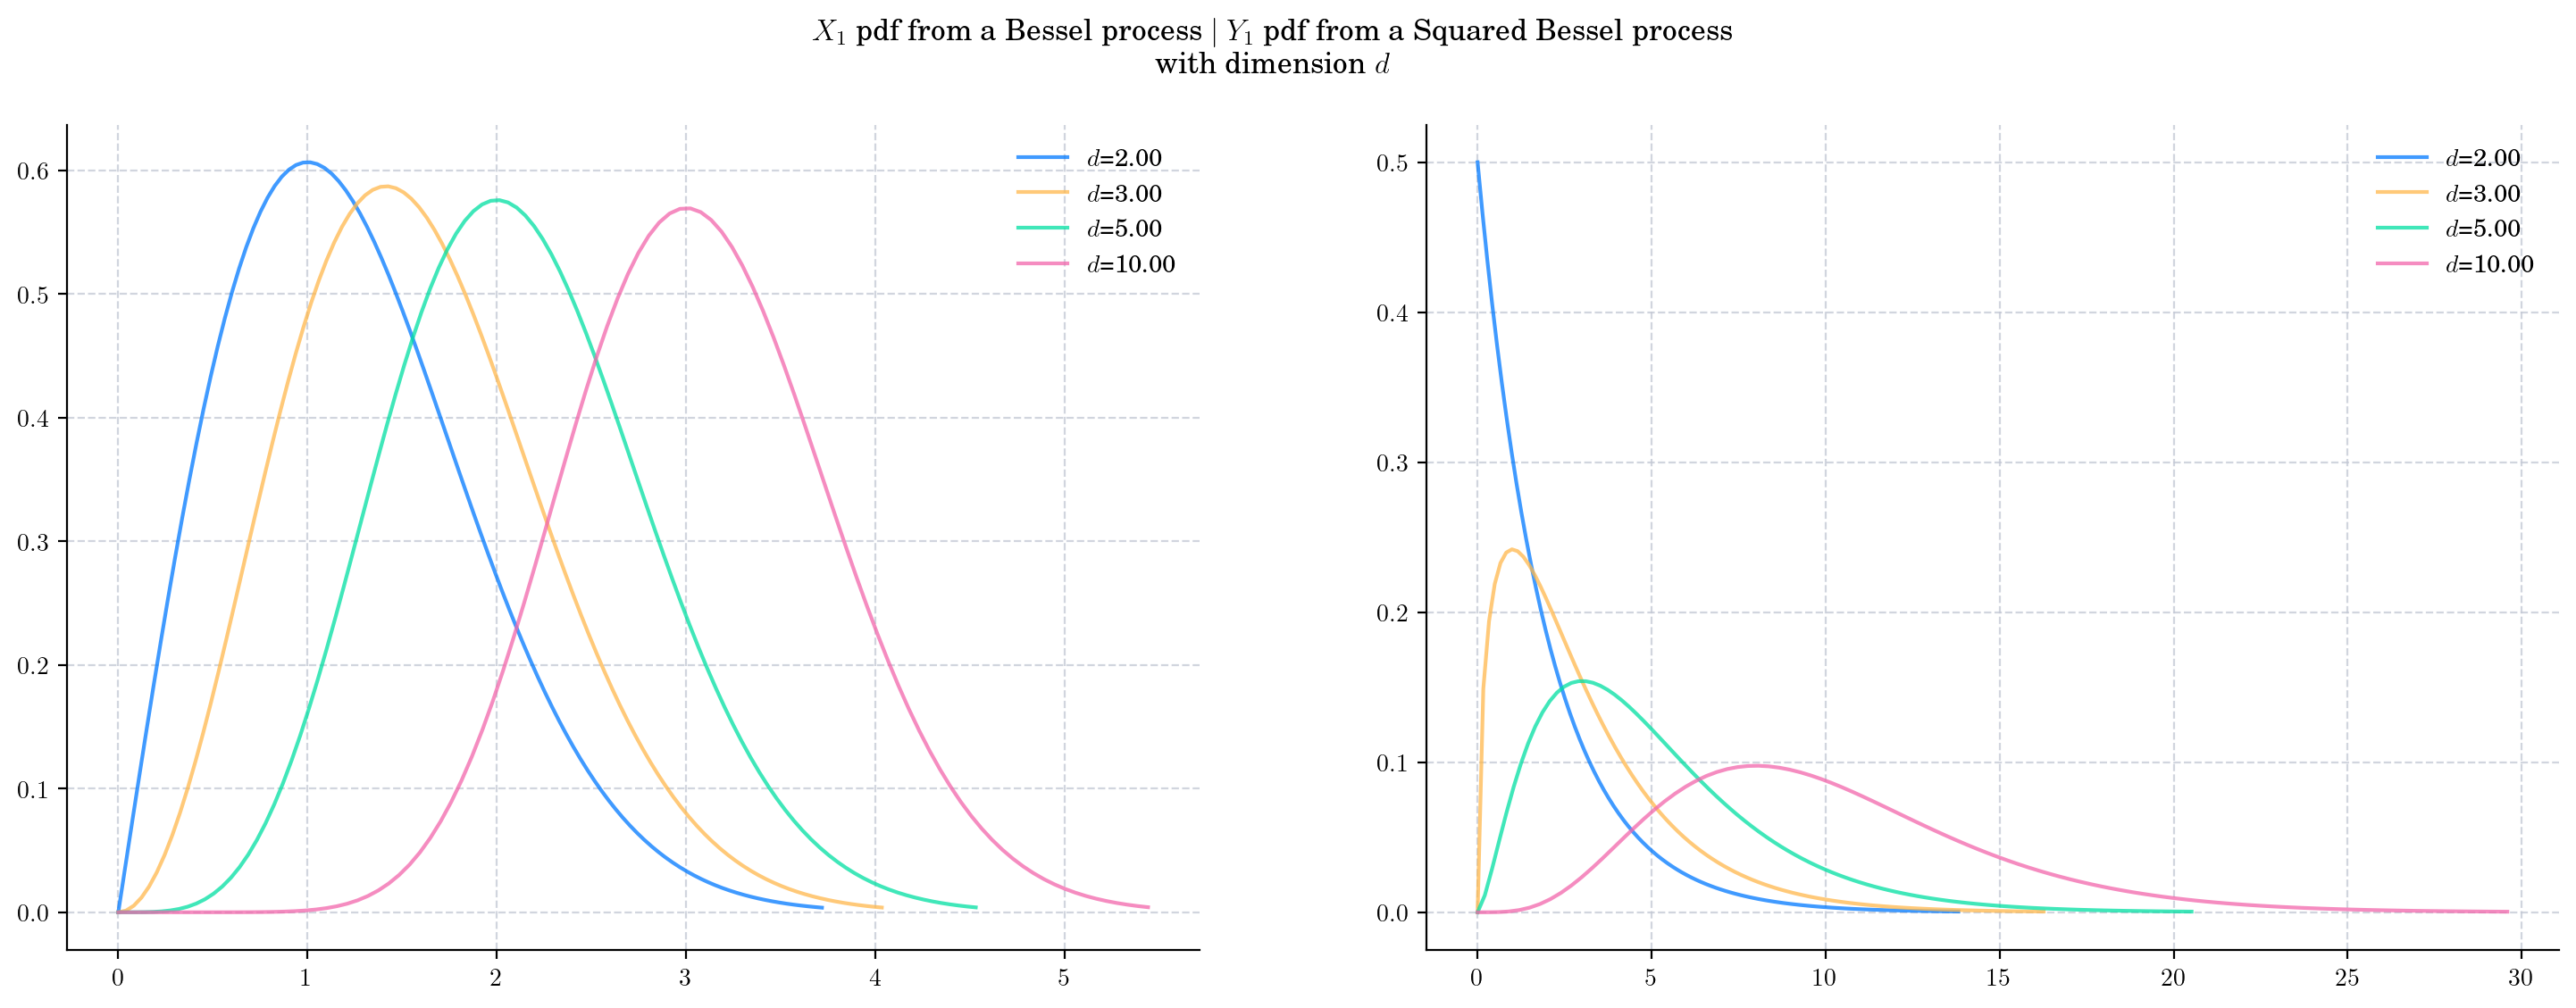

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
dims = [2, 3, 5, 10]
for d in dims:
    processes = [BESProcess(dim=d), BESQProcess(dim=d)]
    for (process, ax) in zip(processes, axs):
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$d$={d:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a Bessel process $\mid$  $Y_1$ pdf from a Squared Bessel process\n with dimension $d$')
plt.show()

Finally, we fix the dimension (to 3) and vary the value of time $t$  and plot the corresponding pdfs. As $t$ increases:

-  The density from the Bessel marginal moves towards the right and becomes wider. This reflects the fact that both the mean and the variance are increasing.
-  The density from the Squared Bessel marginal becomes wider very rapidly as $t$ grows. 

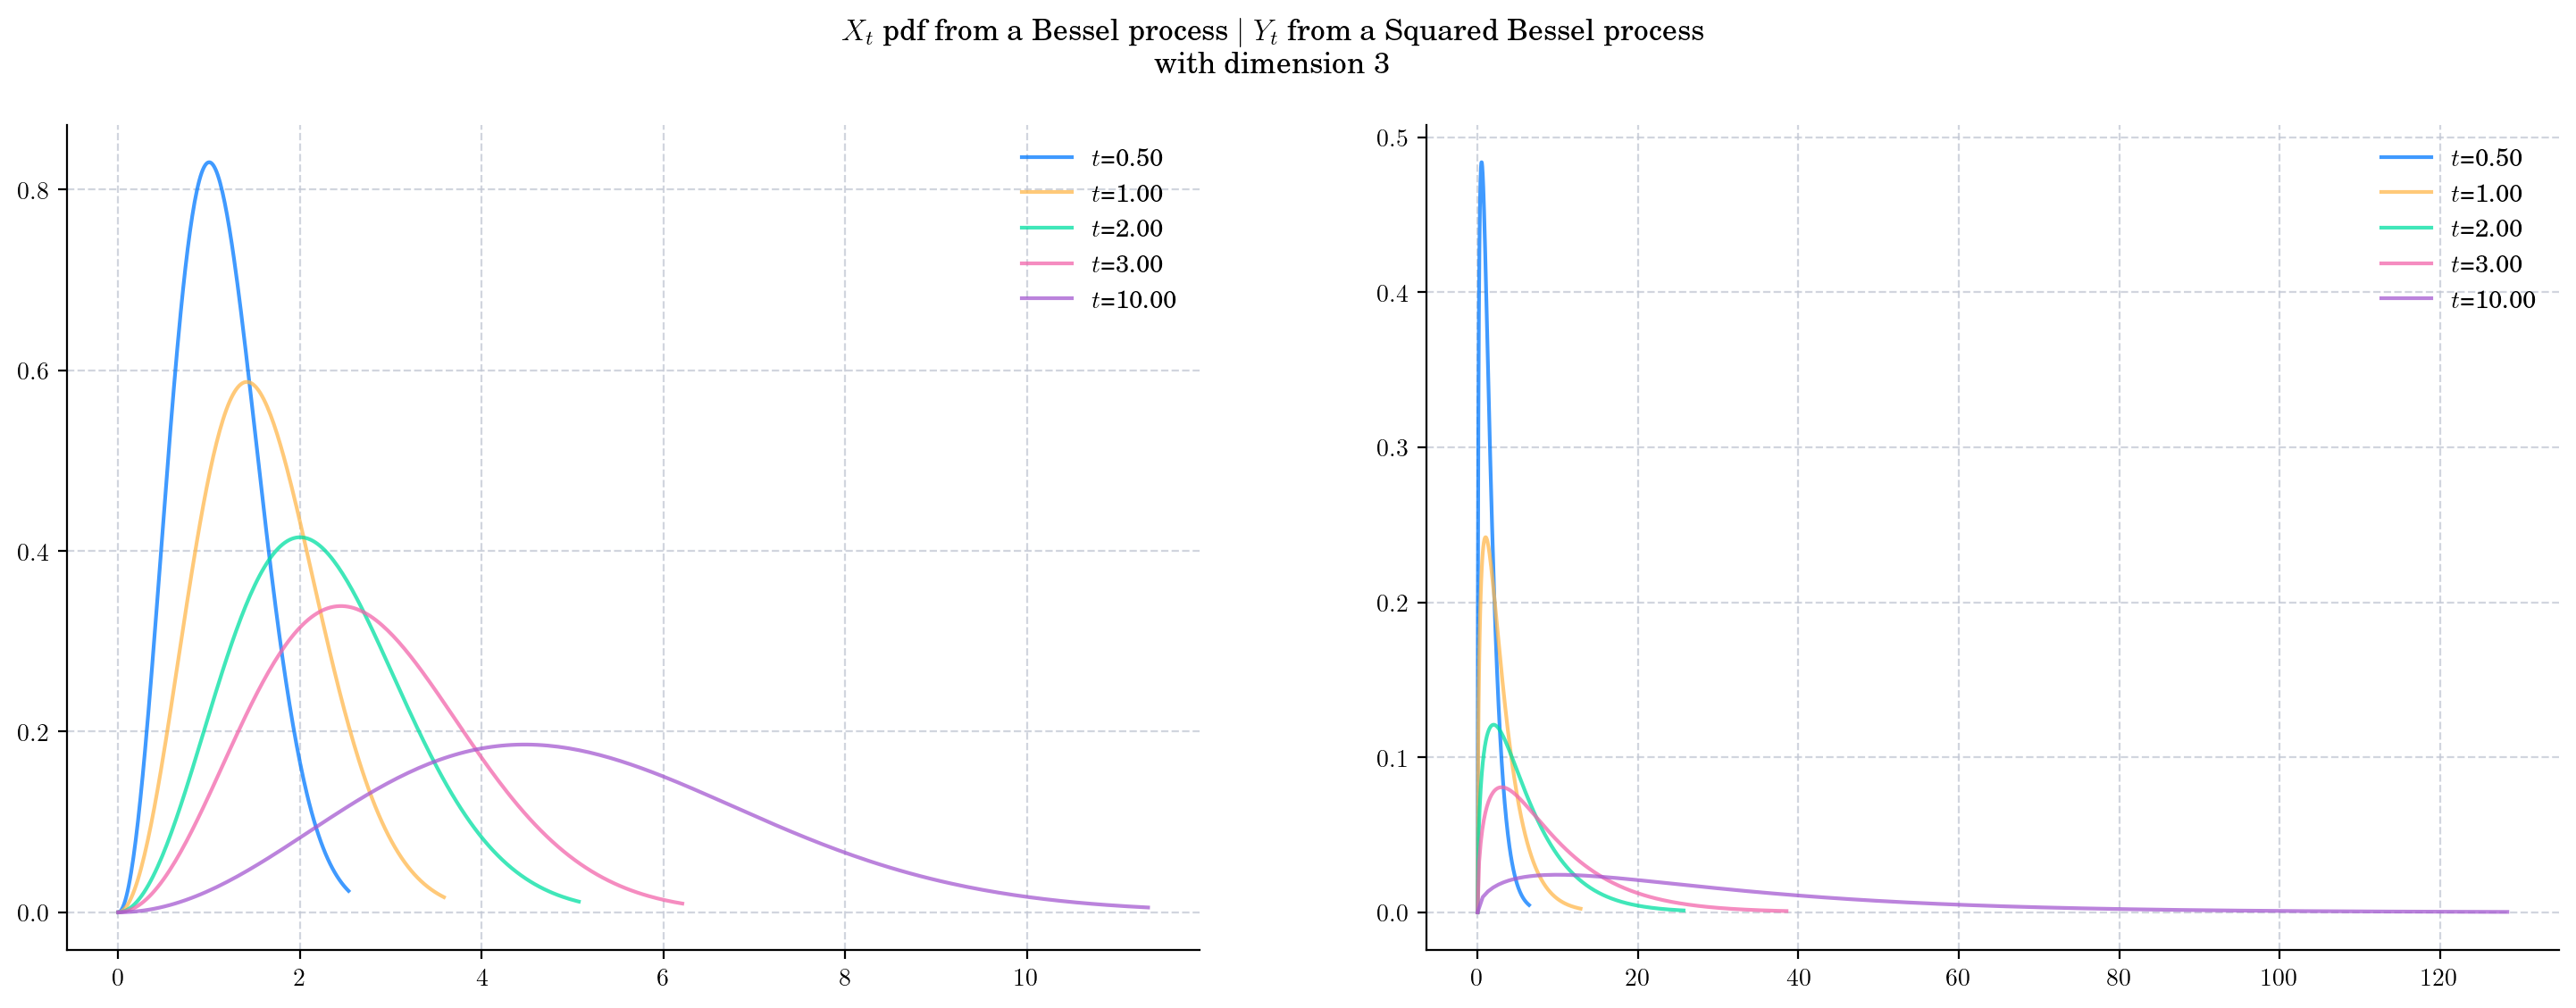

In [17]:
d = 3
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
t_values = [0.5,1, 2, 3, 10]

processes = [BESProcess(dim=d), BESQProcess(dim=d)]

for (process, ax) in zip(processes, axs):
        for t in t_values: 
                X_t = process.get_marginal(t=t)
                x = np.linspace(0, X_t.ppf(0.995), 200)
                ax.plot(x, X_t.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={t:.2f}')
                ax.legend()
fig.suptitle(f'$X_t$ pdf from a Bessel process $\mid$ $Y_t$ from a Squared Bessel process\n with dimension 3')
plt.show()


## Long Time Behaviour


### Expectation and Variance 

#### Bessel


The conditional marginal from a Bessel process $BES_0^d$, with integer dimension $d\geq 2$, satisfies

\begin{equation*}
\lim_{t\rightarrow \infty }\mathbf{E}[X_t] =  \lim_{t\rightarrow \infty } \sqrt{2t}  \dfrac{\Gamma (\frac{d+1}{2})}{\Gamma (\frac{d}{2})} = \infty,
\end{equation*}

and

\begin{equation*}
\lim_{t\rightarrow \infty } \mathbf{Var} [X_t ] =  \lim_{t\rightarrow \infty }  t  \left( d- 2   \dfrac{\Gamma (\frac{d+1}{2})}{\Gamma (\frac{d}{2})} \right)^2 = \infty.
\end{equation*}

That is, both the mean and the variance tend to infinity as $t$ grows. Besides, these expressions imply that the variance grows faster (at linear rate with respect to $t$) than the mean. The next plot illustrates these observations.

In [18]:
def draw_mean_variance(dim=3, T=100):

    process = BESProcess(dim=dim)
    ts = np.linspace(0, T, T)
    means = process.marginal_expectation(ts)
    variances = process.marginal_variance(ts)
    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    
    ax1.plot(ts, means, lw=1.5, color='black', label='$E[X_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  variances, lw=1.5, color='red', label='$Var[X_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle(
        'Expectation and Variance of $X_t$ from a ' + process.name + ' process', size=10)
    plt.show()

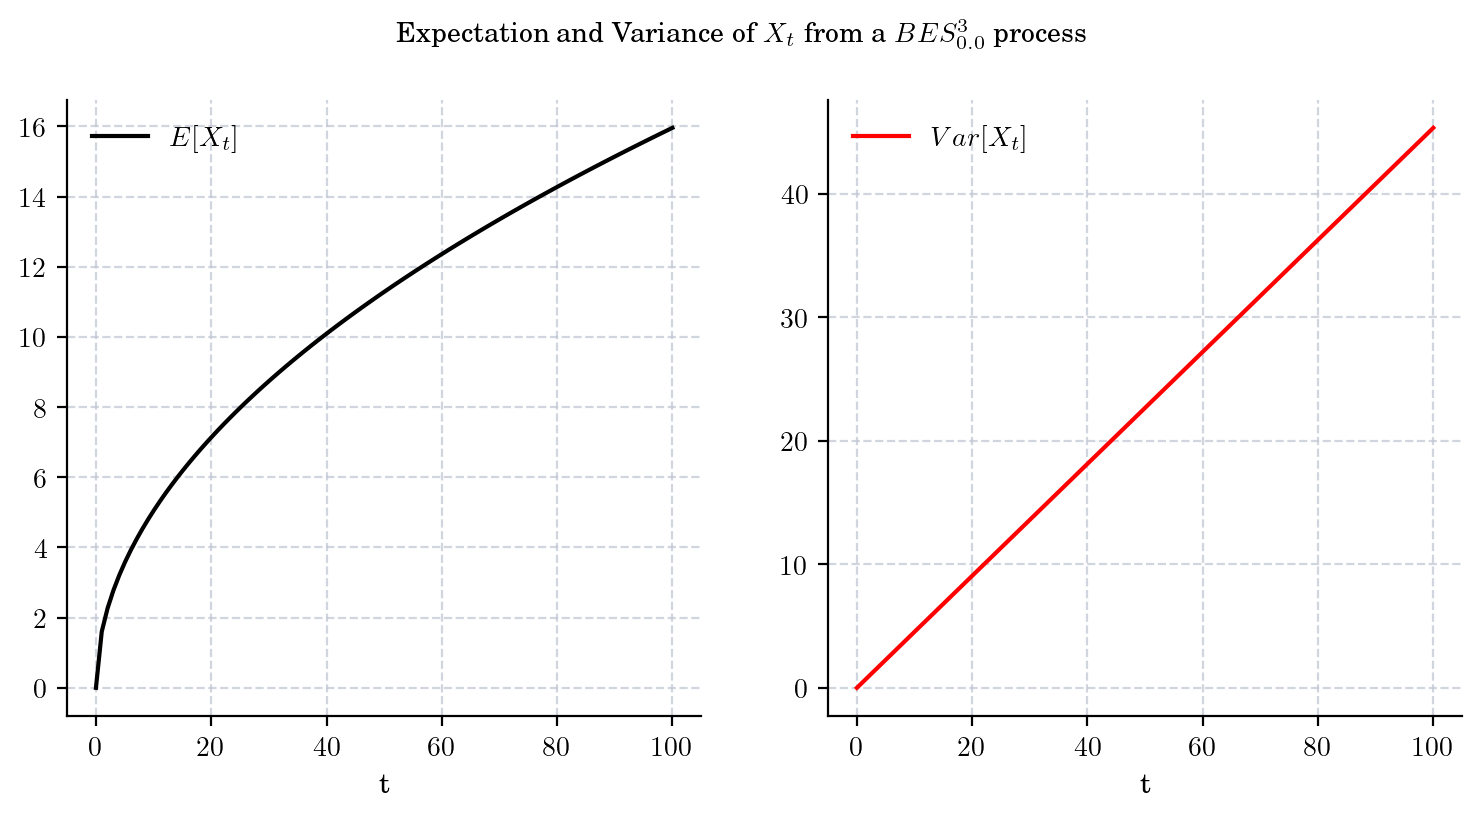

In [19]:
draw_mean_variance(dim=3, T=100)

#### Squared Bessel

The conditional marginal from a Squared Bessel process $BESQ_0^d$, with integer dimension $d\geq 2$, satisfies

\begin{equation*}
\lim_{t\rightarrow \infty }\mathbf{E}[Y_t] =  \lim_{t\rightarrow \infty } td  = \infty,
\end{equation*}

and

\begin{equation*}
\lim_{t\rightarrow \infty } \mathbf{Var} [Y_t ] =  \lim_{t\rightarrow \infty } t^2 2d = \infty.
\end{equation*}


That is, both the mean and the variance tend to infinity as $t$ grows. Besides, from these equations we can conclude that the variance grows faster than the mean.  The next plot illustrates these observations.

In [20]:
def draw_mean_variance(dim=3, T=100):

    process = BESQProcess(dim=dim)
    ts = np.linspace(0.00001, T, T)
    means = process.marginal_expectation(ts)
    variances = process.marginal_variance(ts)
    fig, (ax1, ax2,) = plt.subplots(1, 2, figsize=(9, 4))
    
    ax1.plot(ts, means, lw=1.5, color='black', label='$E[Y_t]$')
    ax1.set_xlabel('t')
    ax1.legend()
    ax2.plot(ts,  variances, lw=1.5, color='red', label='$Var[Y_t]$')
    ax2.set_xlabel('t')
    ax2.legend()
    fig.suptitle(
        'Expectation and Variance of $Y_t$ from a ' + process.name + ' process', size=10)
    plt.show()

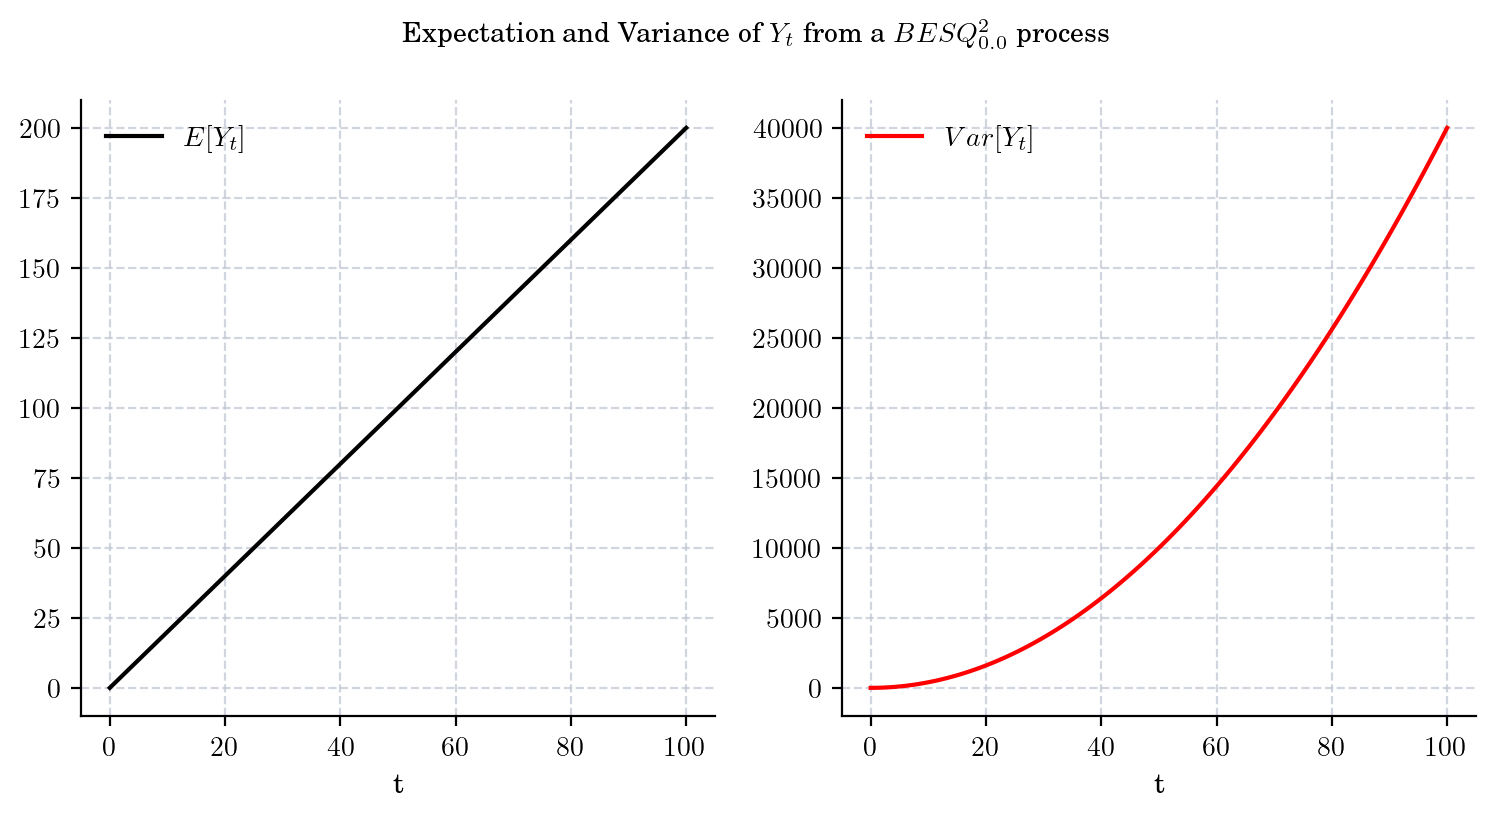

In [21]:
draw_mean_variance(dim=2, T=100)

### Marginal

From equations (6.3) and (6.4) we have:

$$X_t \sim \sqrt{t} \chi (d)  \rightarrow \infty, \qquad  \hbox{as } t\rightarrow \infty,$$ 

and 

$$Y_t \sim t \chi^2(d) \rightarrow \infty, \qquad  \hbox{as } t\rightarrow \infty.$$

The following charts illustrate this behaviour. 

In particular, we can see that both the probability density functions corresponding to $X_t$, and $Y_t$, become flatter and wider as $t$ grows.   

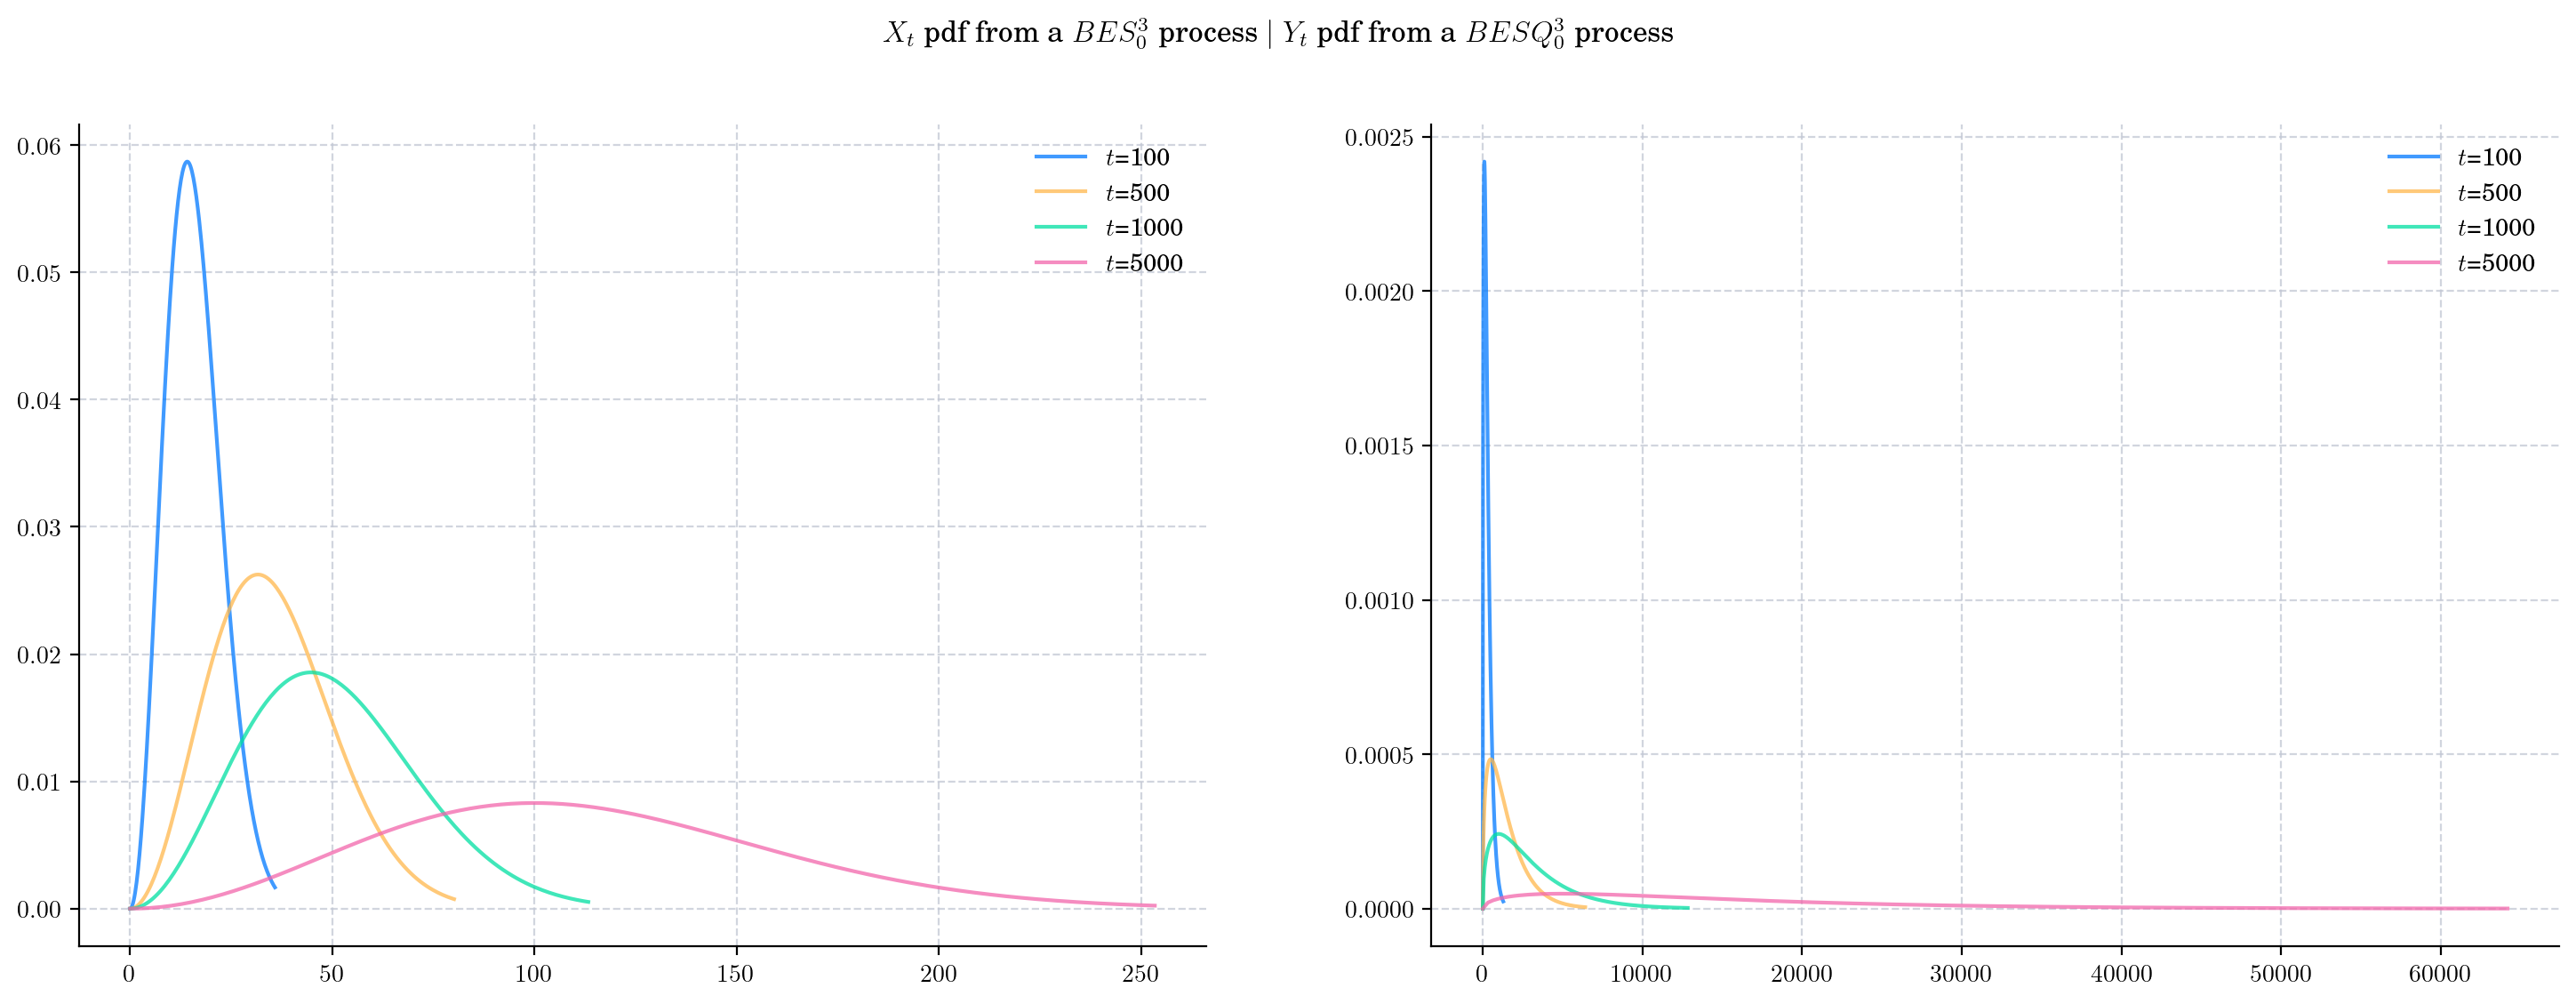

In [22]:
d = 3
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
t_values = [100, 500, 1000, 5000]
processes = [BESProcess(dim=d), BESQProcess(dim=d)]

for (process, ax) in zip(processes, axs):
    for t in t_values:
        X_t = process.get_marginal(t=t)
        x = np.linspace(0, X_t.ppf(0.995), 200)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$t$={t:.0f}')
        ax.legend()
fig.suptitle(
    f'$X_t$ pdf from a $BES_0^3$ process $\mid$ $Y_t$ pdf from a $BESQ_0^3$ process')
plt.show()

The following two charts show simulations from processes $BES_0^3,$ and $BESQ_0^3$, over the interval $[0,5000]$. In both cases, the plots illustrate the described long time behaviour.

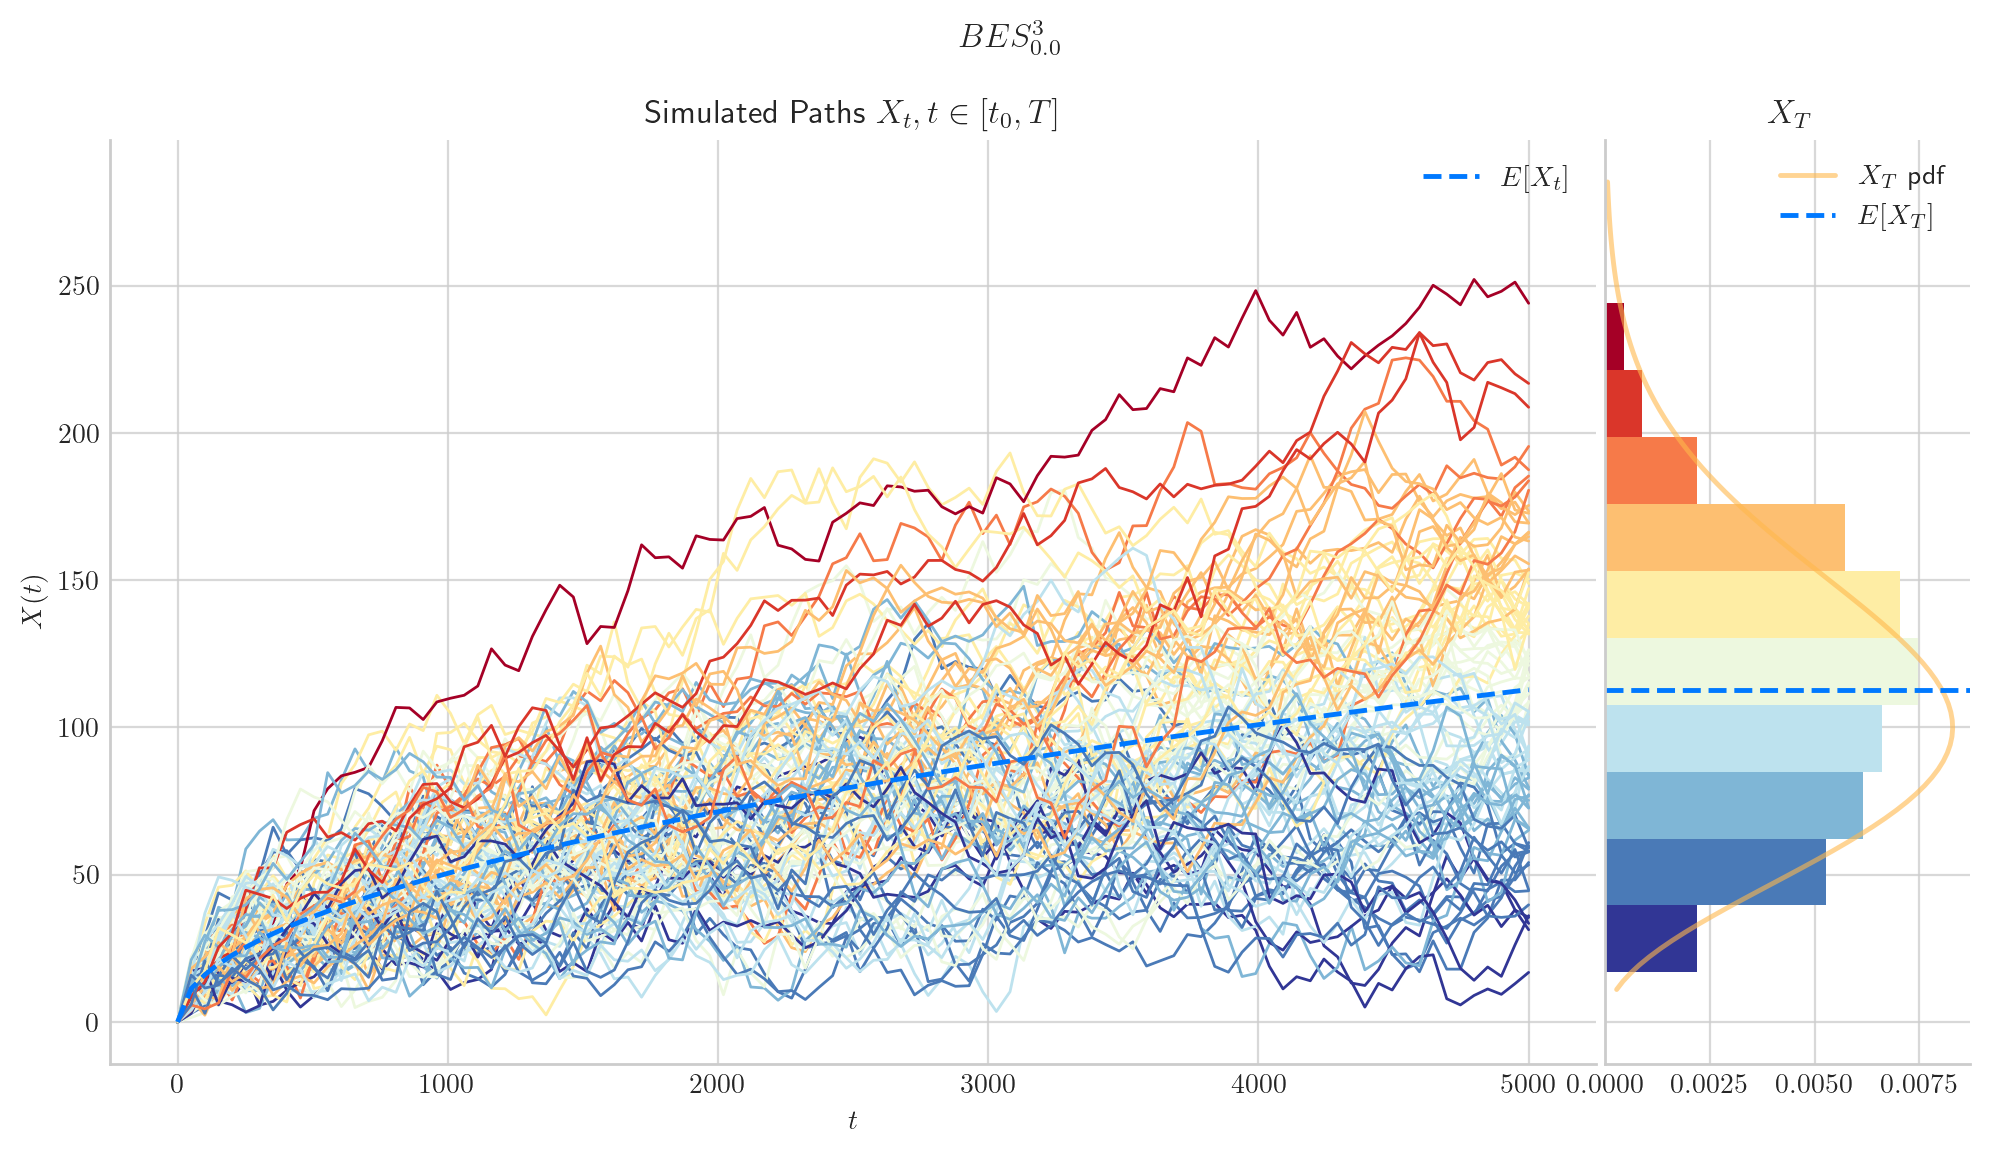

In [23]:
from aleatory.processes import BESProcess
bes = BESProcess(dim=3, T=5000)
bes.draw(n=100, N=100)
plt.show()

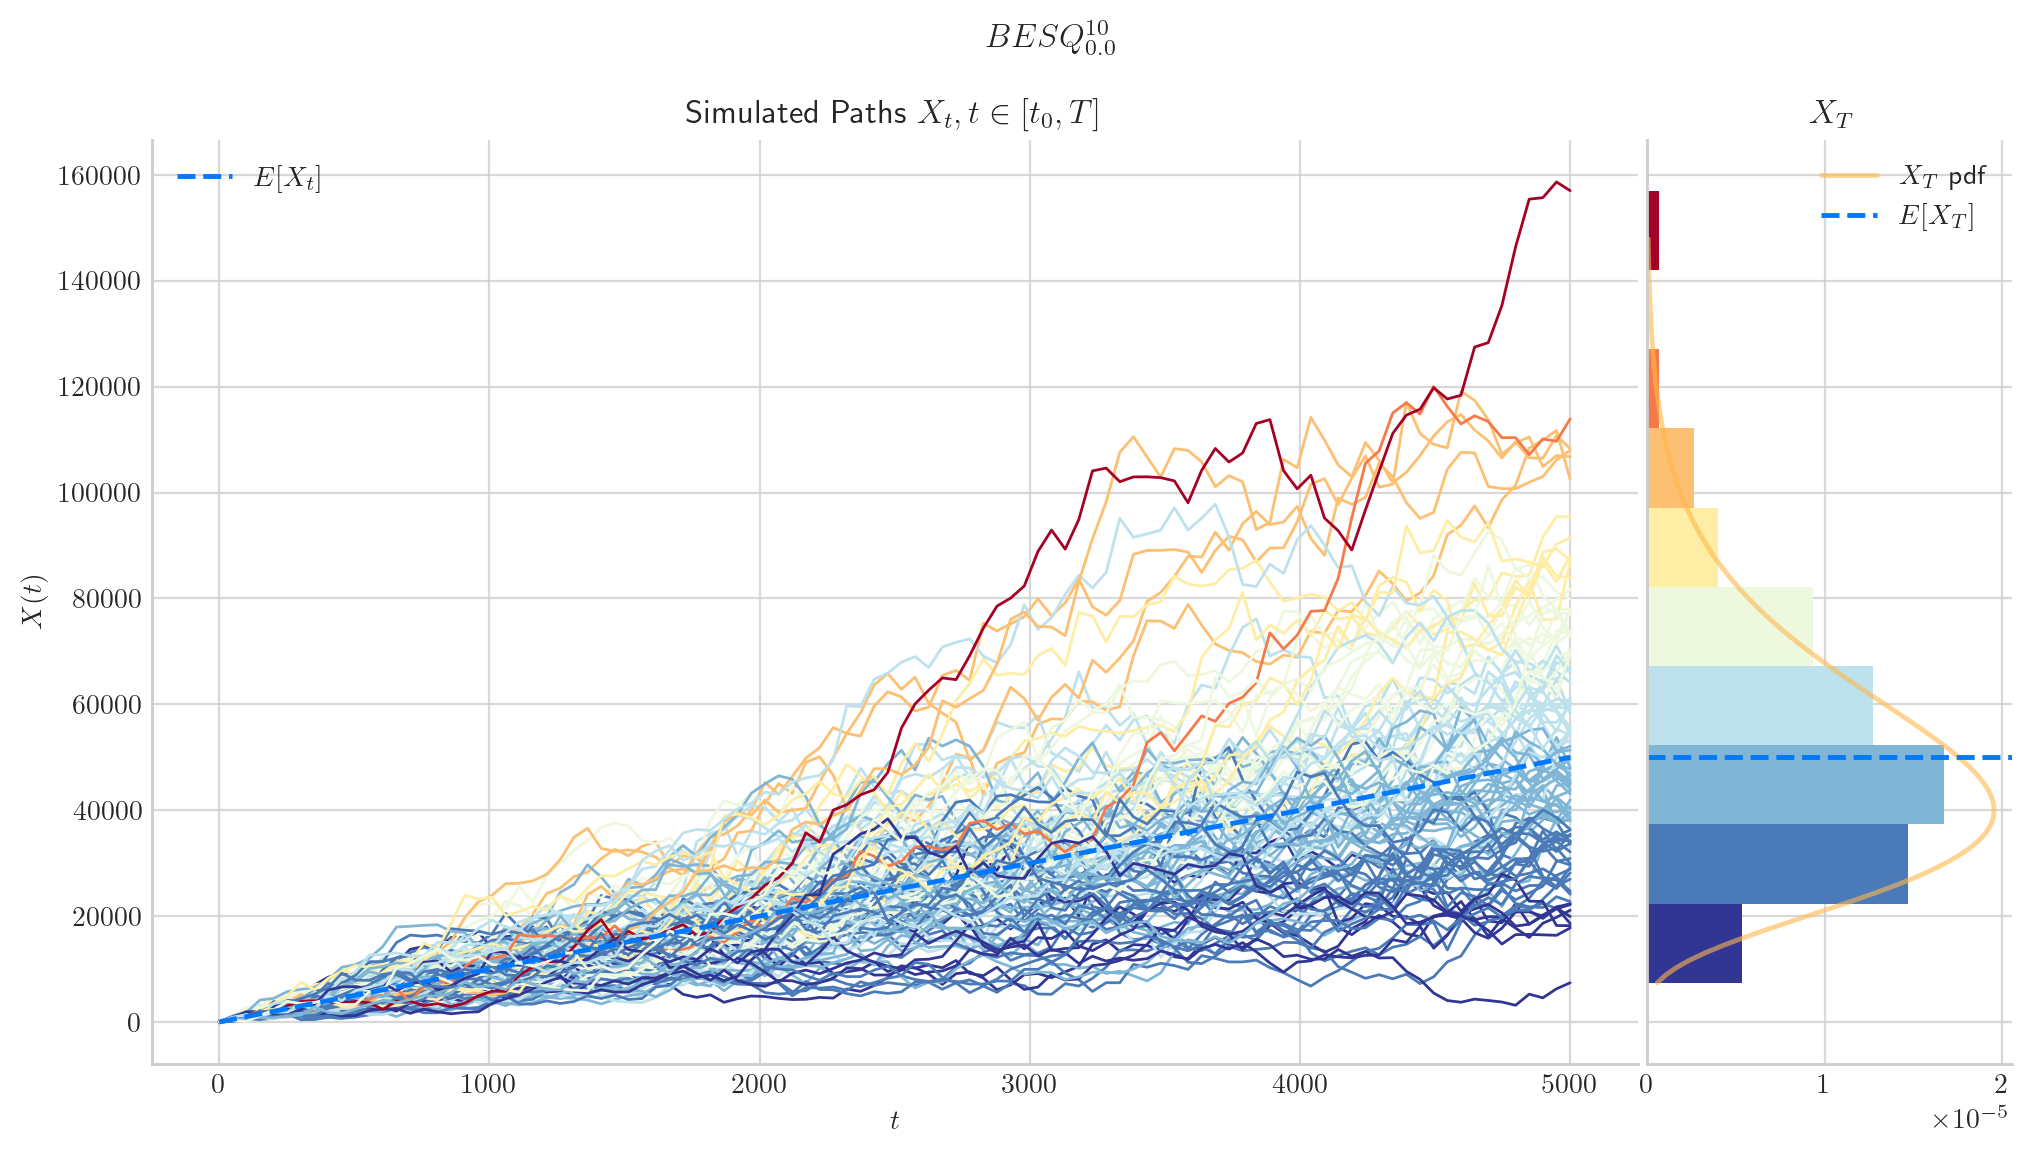

In [24]:
from aleatory.processes import BESProcess
bes = BESQProcess(dim=10, T=5000)
bes.draw(n=100, N=100)
plt.show()

## Final Visualisations

To finish this note, let us take a look at some simulations.

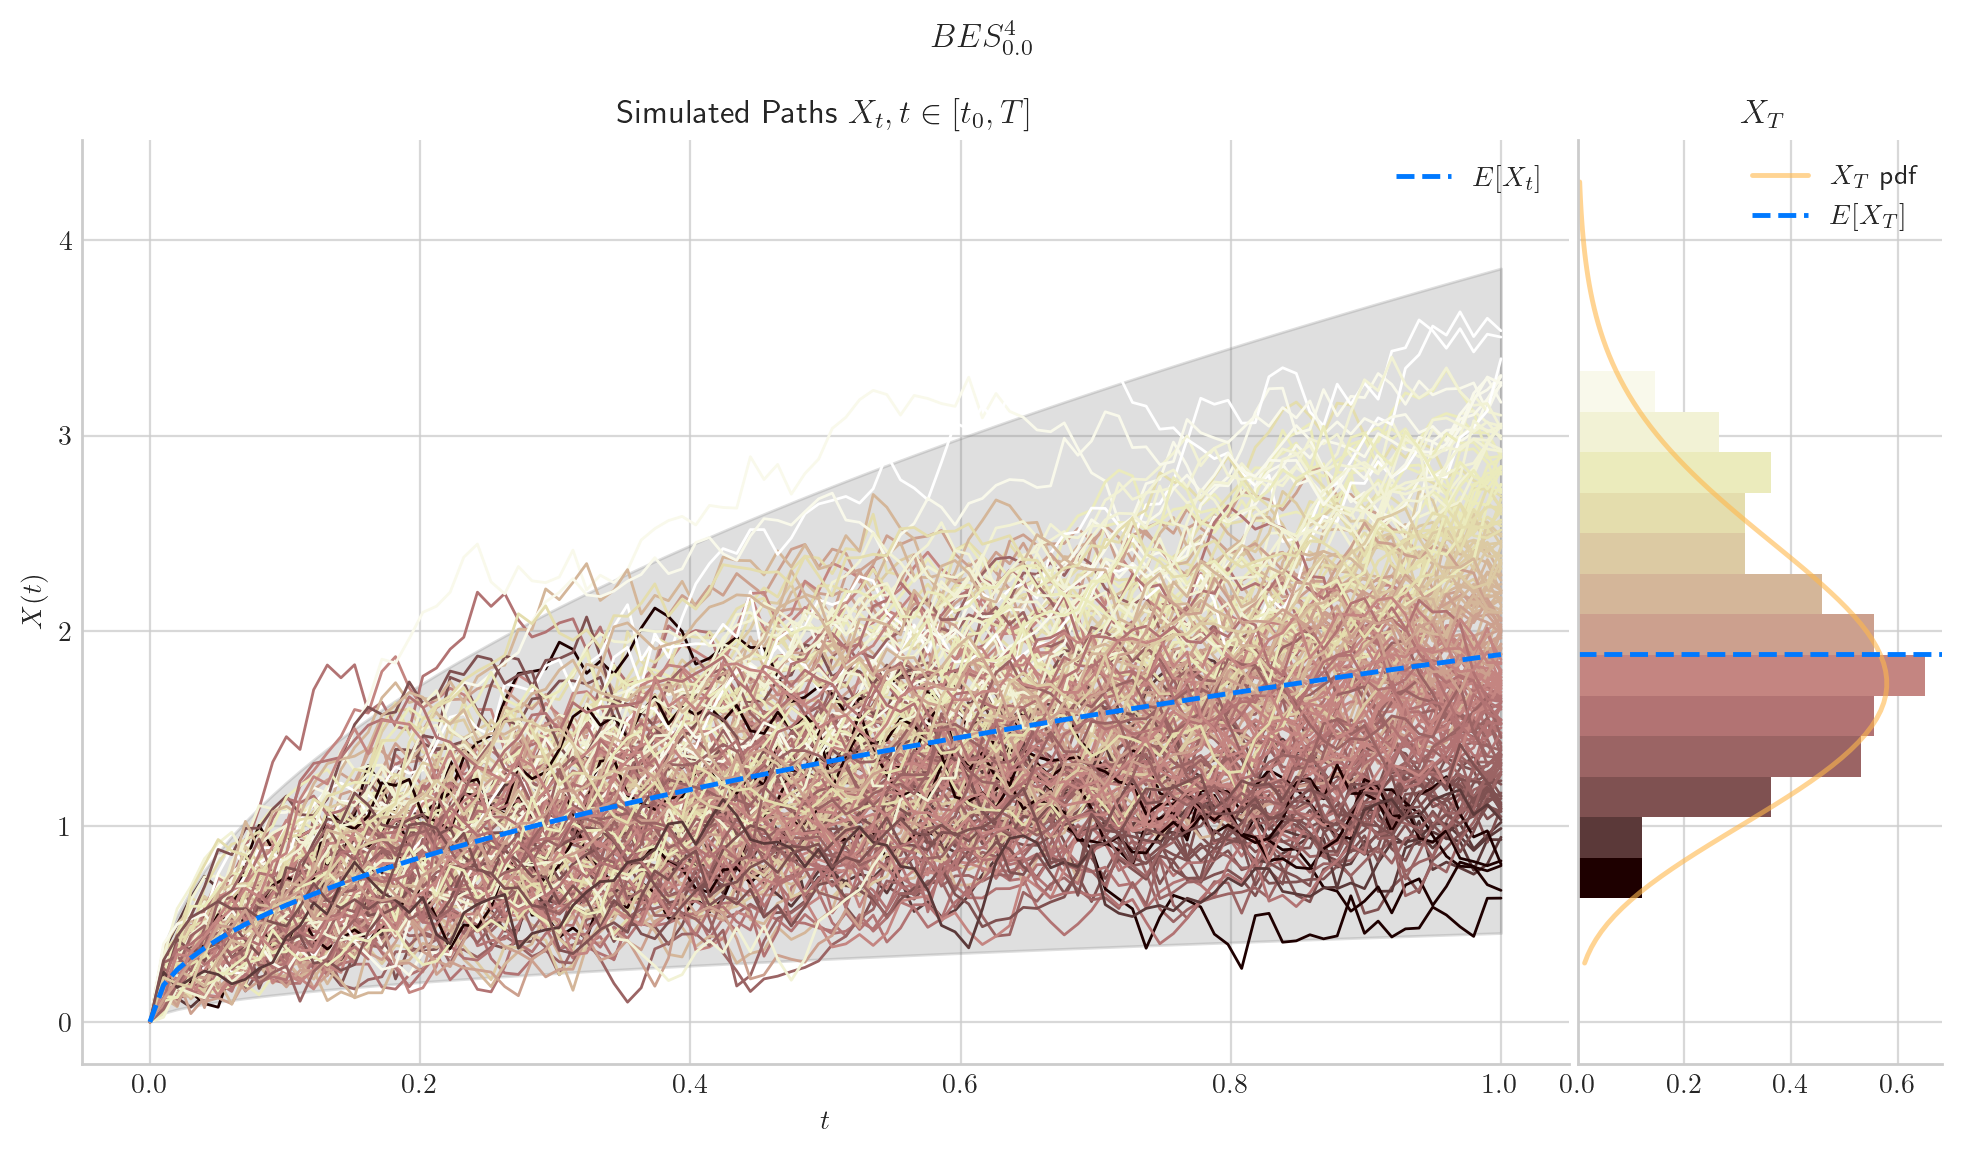

In [25]:
# from aleatory.processes import BESProcess
bes = BESProcess(dim=4, T=1)
bes.draw(n=100, N=200, envelope=True, colormap="pink", )
plt.show()

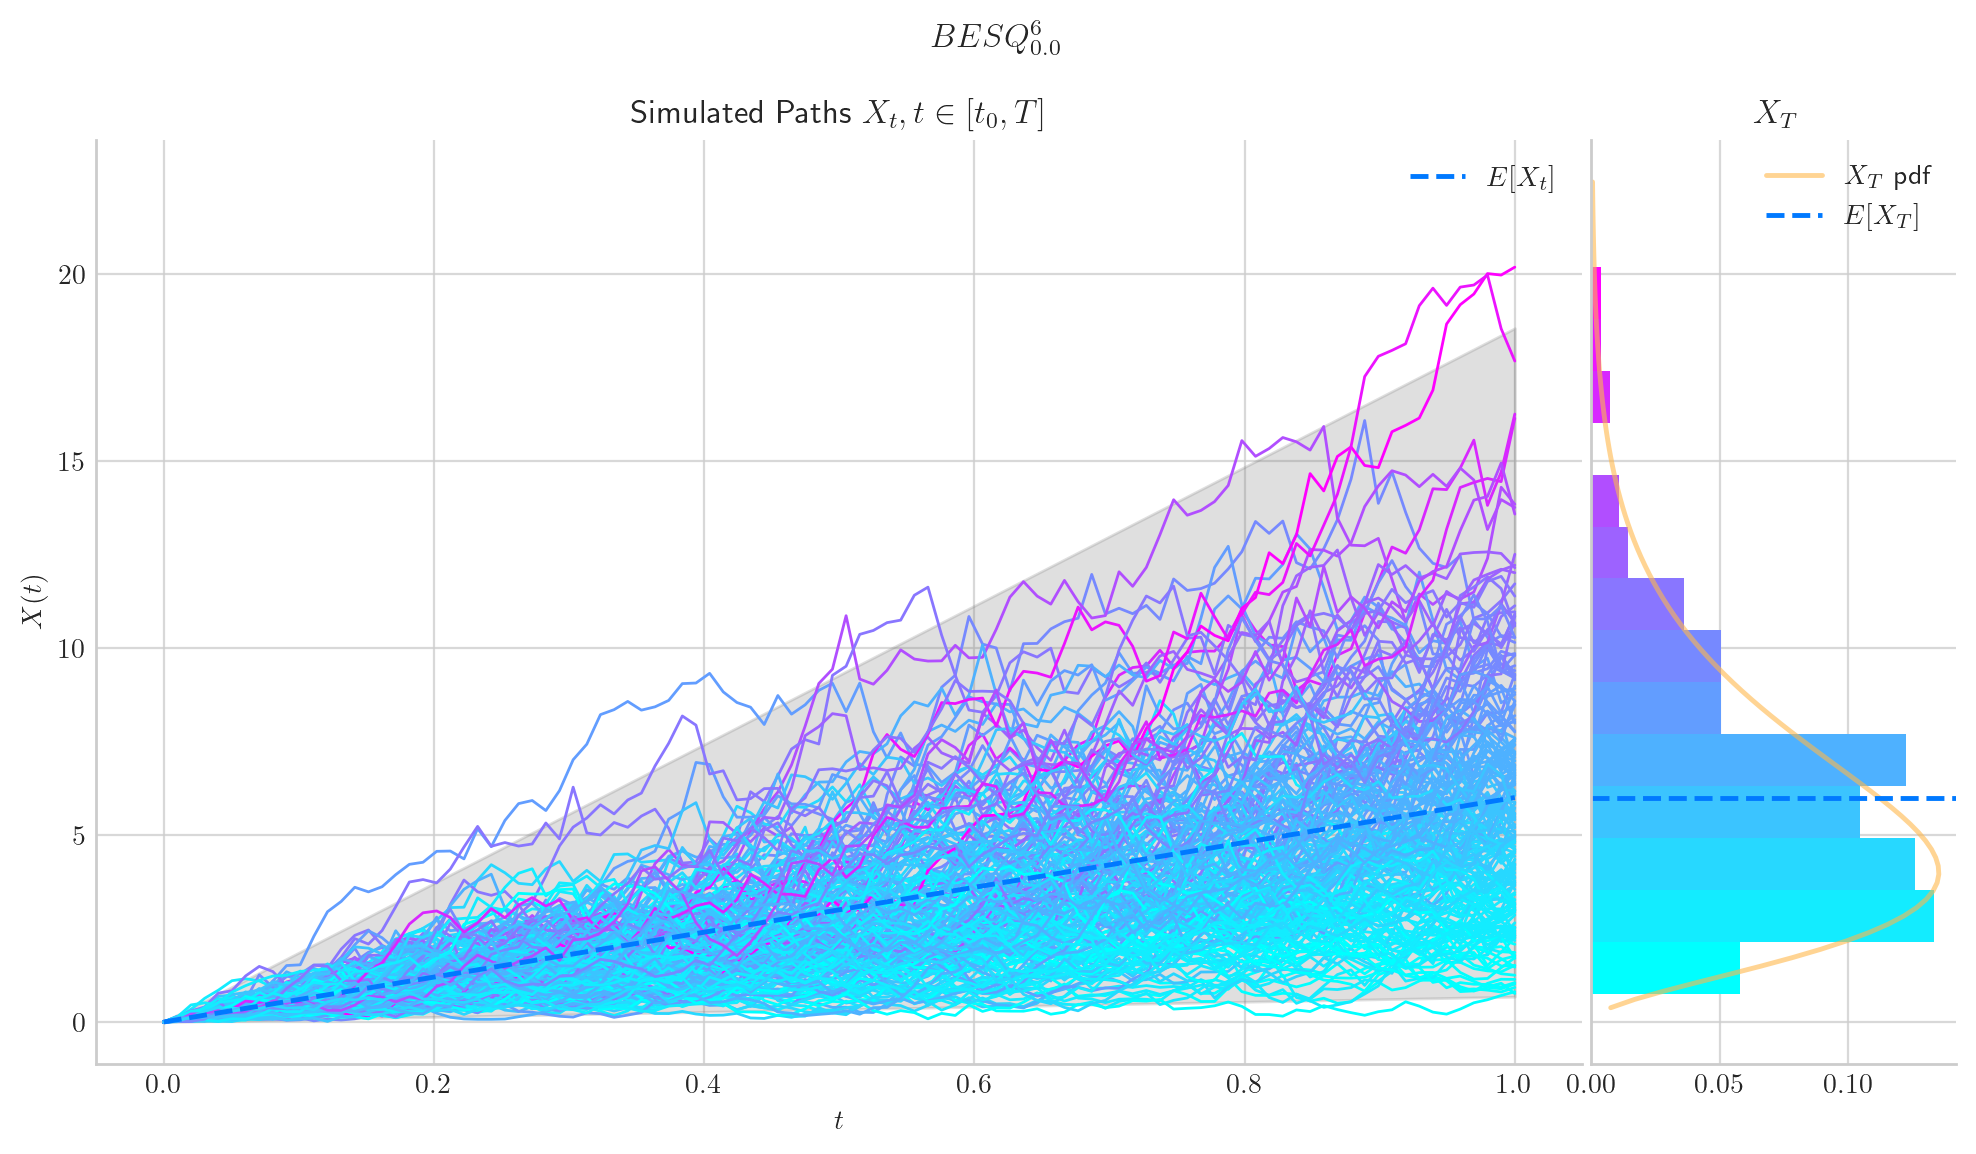

In [26]:
# from aleatory.processes import BESQProcess
bes = BESQProcess(dim=6, T=1.0)
bes.draw(n=100, N=200, envelope=True, colormap="cool", )
plt.show()

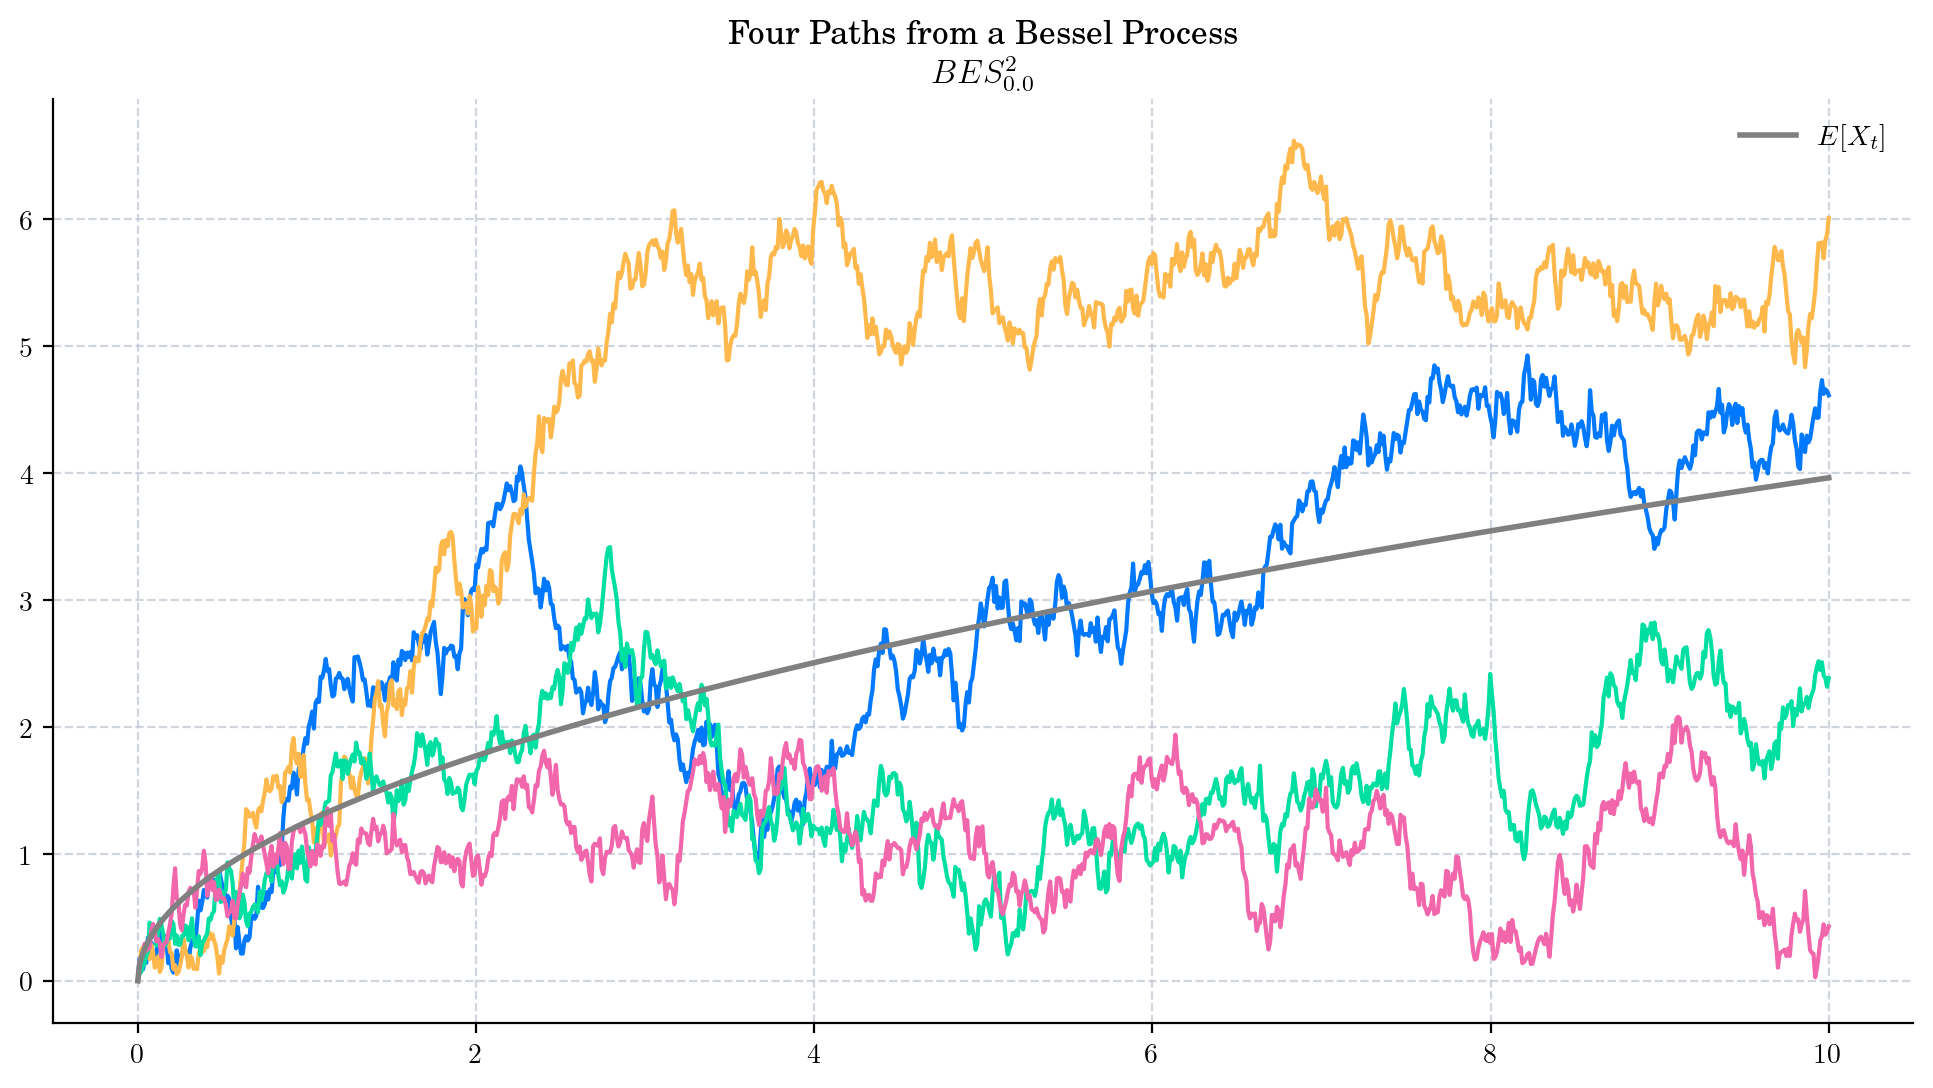

In [27]:
# from aleatory.processes import BESProcess
# import matplotlib.pyplot as plt
# import numpy as np

process = BESProcess(dim=2, T=10, rng=np.random.default_rng(seed=1234))
paths = process.simulate(n=1000, N=4)
ts = process.times
exp = process.marginal_expectation(ts)

for path in paths:
    plt.plot(ts, path)
plt.plot(ts, exp, color='grey',linewidth=2, label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from a Bessel Process\n' + process.name)
plt.show()

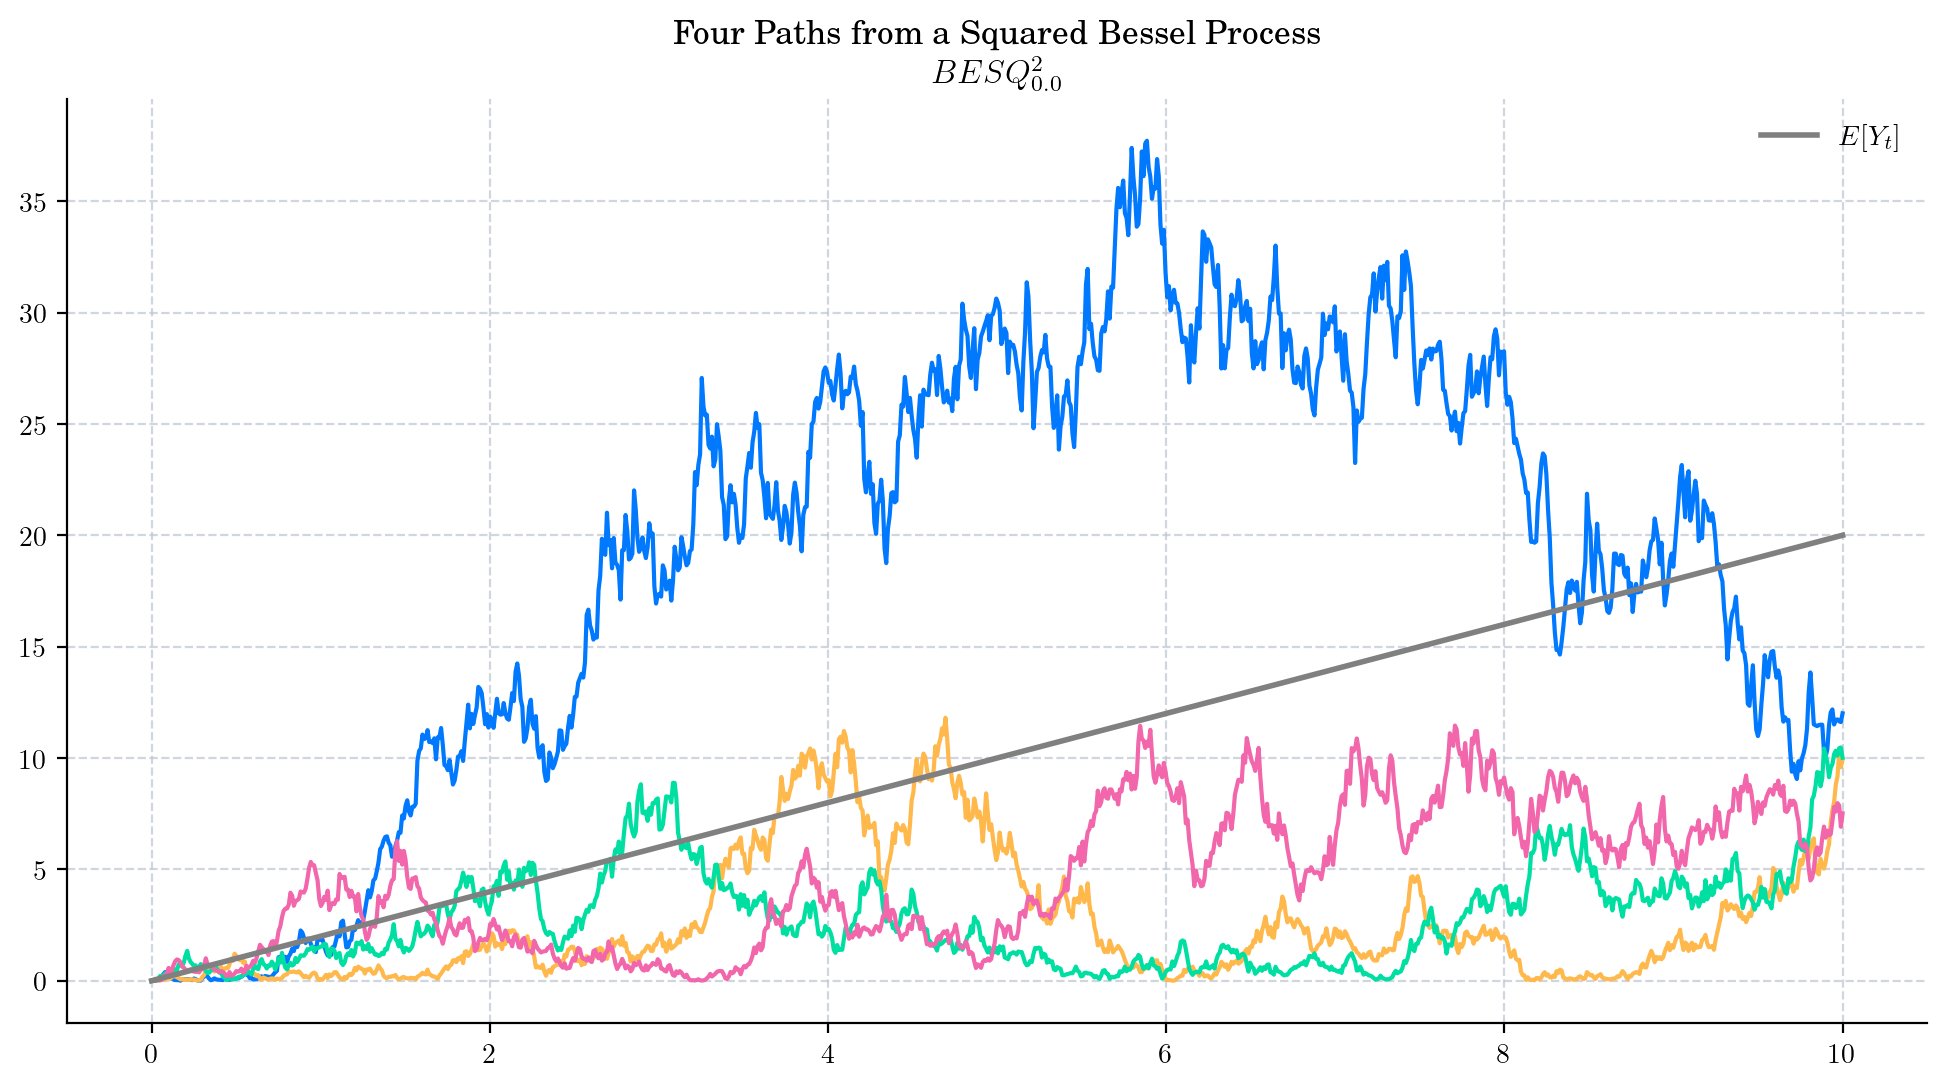

In [28]:
# from aleatory.processes import BESQProcess
# import matplotlib.pyplot as plt
# import numpy as np

process = BESQProcess(dim=2, T=10, rng=np.random.default_rng(seed=12345))
paths = process.simulate(n=1000, N=4)
ts = process.times
exp = process.marginal_expectation(ts)

for path in paths:
    plt.plot(ts, path)
plt.plot(ts, exp, color='grey',linewidth=2, label=f'$E[Y_t]$')
plt.legend()
plt.title('Four Paths from a Squared Bessel Process\n' + process.name)
plt.show()

## References and Further Reading

- "Mathematical Methods for Financial Markets" by Monique Jeanblanc, Marc Yor, Marc Chesney; Springer Science & Business Media, 13 Oct 2009
- [Notes on Bessel Processes](https://www.math.uchicago.edu/~lawler/bessel18new.pdf) by Gregory F. Lawler
- [A Survey and Some Generalizations of Bessel Processes](https://projecteuclid.org/journals/bernoulli/volume-9/issue-2/A-survey-and-some-generalizations-of-Bessel-processes/10.3150/bj/1068128980.full) by Anja Göing-Jaeschke and Marc Yor; Bernoulli Vol. 9, No. 2 (Apr., 2003), pp. 313-349 (37 pages)
- [Squared Bessel processes of positive and negative dimension embedded in Brownian local times](https://www.stats.ox.ac.uk/~winkel/PitmanWinkel2018.pdf) by Jim Pitman, Matthias Winkel; Electron. Commun. Probab. 23: 1-13 (2018). DOI: 10.1214/18-ECP174